In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'

# 1. 데이터 통합

In [ ]:
import pandas as pd

# 데이터 가져오기
childAC_2022_path = "dataset/childAC_2022.csv"  # 파일 경로에 맞게 수정해주세요.
childAC_2022 = pd.read_csv(childAC_2022_path)

childAC_2021_path = "dataset/childAC_2021.csv"  # 파일 경로에 맞게 수정해주세요.
childAC_2021 = pd.read_csv(childAC_2021_path)

childAC_2018_path = "dataset/childAC_2018.csv"  # 파일 경로에 맞게 수정해주세요.
childAC_2018 = pd.read_csv(childAC_2018_path)


In [ ]:
# 데이터 타입 확인
childAC_2022.dtypes

사고번호           int64
사고일시          object
요일            object
시군구           object
사고내용          object
사망자수           int64
중상자수           int64
경상자수           int64
부상신고자수         int64
사고유형          object
법규위반          object
노면상태          object
기상상태          object
도로형태          object
가해운전자 차종      object
가해운전자 성별      object
가해운전자 연령      object
가해운전자 상해정도    object
피해운전자 차종      object
피해운전자 성별      object
피해운전자 연령      object
피해운전자 상해정도    object
dtype: object

In [ ]:
childAC_2021.dtypes

사고번호           int64
사고일시          object
요일            object
시군구           object
사고내용          object
사망자수           int64
중상자수           int64
경상자수           int64
부상신고자수         int64
사고유형          object
법규위반          object
노면상태          object
기상상태          object
도로형태          object
가해운전자 차종      object
가해운전자 성별      object
가해운전자 연령      object
가해운전자 상해정도    object
피해운전자 차종      object
피해운전자 성별      object
피해운전자 연령      object
피해운전자 상해정도    object
dtype: object

In [ ]:
childAC_2018.dtypes

사고번호           int64
사고일시          object
요일            object
시군구           object
사고내용          object
사망자수           int64
중상자수           int64
경상자수           int64
부상신고자수         int64
사고유형          object
법규위반          object
노면상태          object
기상상태          object
도로형태          object
가해운전자 차종      object
가해운전자 성별      object
가해운전자 연령      object
가해운전자 상해정도    object
피해운전자 차종      object
피해운전자 성별      object
피해운전자 연령      object
피해운전자 상해정도    object
dtype: object

### 데이터 통합

In [ ]:
#데이터 합치기


child = [childAC_2018, childAC_2021, childAC_2022]

# 모든 데이터프레임을 하나로 합치기
childAc_all = pd.concat(child, ignore_index=True)

# 결과 확인
num_rows = childAc_all.shape[0]
print("Number of rows:", num_rows)

Number of rows: 8904


In [ ]:
output_csv_path = "dataset/childAc_all.csv"

# 데이터프레임을 CSV 파일로 내보내기
childAc_all.to_csv(output_csv_path, index=False)

print(f"데이터프레임이 {output_csv_path}로 내보내졌습니다.")

데이터프레임이 dataset/childAc_all.csv로 내보내졌습니다.


In [ ]:
# 데이터 가져오기
childAc_all_path = "dataset/childAc_all.csv"  # 파일 경로에 맞게 수정해주세요.
childAc_all = pd.read_csv(childAc_all_path)

childAc_all.head

<bound method NDFrame.head of                   사고번호               사고일시   요일              시군구  사고내용  사망자수  \
0     2016010100100237    2016년 1월 1일 13시  금요일    서울특별시 서초구 반포동  중상사고     0   
1     2016010100100379    2016년 1월 1일 19시  금요일    서울특별시 강남구 개포동  중상사고     0   
2     2016010200100251    2016년 1월 2일 16시  토요일    서울특별시 중랑구 중화동  중상사고     0   
3     2016010200100275    2016년 1월 2일 17시  토요일    서울특별시 관악구 신림동  중상사고     0   
4     2016010300100150    2016년 1월 3일 11시  일요일  서울특별시 성동구 성수동1가  경상사고     0   
...                ...                ...  ...              ...   ...   ...   
8899  2022123000100433  2022년 12월 30일 17시  금요일    서울특별시 노원구 월계동  경상사고     0   
8900  2022123000100499  2022년 12월 30일 18시  금요일    서울특별시 서초구 서초동  경상사고     0   
8901  2022123100100220  2022년 12월 31일 13시  토요일     서울특별시 중구 남창동  경상사고     0   
8902  2022123100100256  2022년 12월 31일 14시  토요일    서울특별시 은평구 응암동  경상사고     0   
8903  2022123100100342  2022년 12월 31일 17시  토요일    서울특별시 양천구 신정동  경상사고     0   

      중상자수  경상자수  부상신

In [ ]:
childAc_all = childAc_all[~childAc_all['사고일시'].str.contains("2016", na=False, case=False)]

In [ ]:
childAc_all = childAc_all[~childAc_all['사고일시'].str.contains("2017", na=False, case=False)]

### 피해자 : 13세 이하 아동만 추출

In [ ]:

# "피해운전자 연령"이 특정 값들을 가지지 않는 행만 남기기
valid_age_values = ["0세", "1세", "2세", "3세", "4세", "5세", "6세", "7세", "8세", "9세", "10세", "11세", "12세", "13세"]
filtered_childAc_all = childAc_all[childAc_all["피해운전자 연령"].isin(valid_age_values)]

# 결과 확인
print(filtered_childAc_all.head())


# 결과 확인
num_rows = filtered_childAc_all.shape[0]
print("Number of rows:", num_rows)

                  사고번호             사고일시   요일               시군구  사고내용  사망자수  \
2985  2018010300100176  2018년 1월 3일 12시  수요일     서울특별시 노원구 상계동  경상사고     0   
2987  2018010400100271  2018년 1월 4일 16시  목요일  서울특별시 영등포구 당산동4가  경상사고     0   
2988  2018010400100393  2018년 1월 4일 20시  목요일     서울특별시 양천구 신정동  중상사고     0   
2990  2018010500100203  2018년 1월 5일 13시  금요일     서울특별시 강서구 방화동  경상사고     0   
2992  2018010500100535  2018년 1월 5일 23시  금요일     서울특별시 양천구 신월동  경상사고     0   

      중상자수  경상자수  부상신고자수          사고유형  ... 기상상태            도로형태 가해운전자 차종  \
2985     0     1       0    차대차 - 측면충돌  ...   맑음  교차로 - 교차로횡단보도내       승용   
2987     0     1       0    차대사람 - 횡단중  ...   맑음  교차로 - 교차로횡단보도내       승용   
2988     1     0       0    차대사람 - 횡단중  ...   맑음  교차로 - 교차로횡단보도내       이륜   
2990     0     1       0  차대사람 - 보도통행중  ...   맑음        단일로 - 기타       승용   
2992     0     1       0    차대차 - 측면충돌  ...   맑음  교차로 - 교차로횡단보도내       화물   

     가해운전자 성별 가해운전자 연령 가해운전자 상해정도 피해운전자 차종 피해운전자 성별 피해운전자 연령 피해운전자 상

In [ ]:
filtered_childAc_all.dtypes

사고번호           int64
사고일시          object
요일            object
시군구           object
사고내용          object
사망자수           int64
중상자수           int64
경상자수           int64
부상신고자수         int64
사고유형          object
법규위반          object
노면상태          object
기상상태          object
도로형태          object
가해운전자 차종      object
가해운전자 성별      object
가해운전자 연령      object
가해운전자 상해정도    object
피해운전자 차종      object
피해운전자 성별      object
피해운전자 연령      object
피해운전자 상해정도    object
dtype: object

### 불필요한 단어 정리

In [ ]:
# "시군구" 칼럼의 값을 수정하여 변경
filtered_childAc_all["시군구"] = filtered_childAc_all["시군구"].str.replace("서울특별시", "")

# 결과 확인
print(filtered_childAc_all.head())

                  사고번호             사고일시   요일          시군구  사고내용  사망자수  중상자수  \
2985  2018010300100176  2018년 1월 3일 12시  수요일      노원구 상계동  경상사고     0     0   
2987  2018010400100271  2018년 1월 4일 16시  목요일   영등포구 당산동4가  경상사고     0     0   
2988  2018010400100393  2018년 1월 4일 20시  목요일      양천구 신정동  중상사고     0     1   
2990  2018010500100203  2018년 1월 5일 13시  금요일      강서구 방화동  경상사고     0     0   
2992  2018010500100535  2018년 1월 5일 23시  금요일      양천구 신월동  경상사고     0     0   

      경상자수  부상신고자수          사고유형  ... 기상상태            도로형태 가해운전자 차종 가해운전자 성별  \
2985     1       0    차대차 - 측면충돌  ...   맑음  교차로 - 교차로횡단보도내       승용        남   
2987     1       0    차대사람 - 횡단중  ...   맑음  교차로 - 교차로횡단보도내       승용        여   
2988     0       0    차대사람 - 횡단중  ...   맑음  교차로 - 교차로횡단보도내       이륜        남   
2990     1       0  차대사람 - 보도통행중  ...   맑음        단일로 - 기타       승용        남   
2992     1       0    차대차 - 측면충돌  ...   맑음  교차로 - 교차로횡단보도내       화물        남   

     가해운전자 연령 가해운전자 상해정도 피해운전자 차종 피해운전자 성별 피

C:\Users\user\AppData\Local\Temp\ipykernel_165256\3803182395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_childAc_all["시군구"] = filtered_childAc_all["시군구"].str.replace("서울특별시", "")


In [ ]:
import re

# "시군구" 칼럼의 값을 수정하여 변경
pattern = r"구\s.*?동$"
filtered_childAc_all["시군구"] = filtered_childAc_all["시군구"].apply(lambda x: re.sub(pattern, "", x))

# 결과 확인
print(filtered_childAc_all.head())


                  사고번호             사고일시   요일          시군구  사고내용  사망자수  중상자수  \
2985  2018010300100176  2018년 1월 3일 12시  수요일           노원  경상사고     0     0   
2987  2018010400100271  2018년 1월 4일 16시  목요일   영등포구 당산동4가  경상사고     0     0   
2988  2018010400100393  2018년 1월 4일 20시  목요일           양천  중상사고     0     1   
2990  2018010500100203  2018년 1월 5일 13시  금요일           강서  경상사고     0     0   
2992  2018010500100535  2018년 1월 5일 23시  금요일           양천  경상사고     0     0   

      경상자수  부상신고자수          사고유형  ... 기상상태            도로형태 가해운전자 차종 가해운전자 성별  \
2985     1       0    차대차 - 측면충돌  ...   맑음  교차로 - 교차로횡단보도내       승용        남   
2987     1       0    차대사람 - 횡단중  ...   맑음  교차로 - 교차로횡단보도내       승용        여   
2988     0       0    차대사람 - 횡단중  ...   맑음  교차로 - 교차로횡단보도내       이륜        남   
2990     1       0  차대사람 - 보도통행중  ...   맑음        단일로 - 기타       승용        남   
2992     1       0    차대차 - 측면충돌  ...   맑음  교차로 - 교차로횡단보도내       화물        남   

     가해운전자 연령 가해운전자 상해정도 피해운전자 차종 피해운전자 성별 피

C:\Users\user\AppData\Local\Temp\ipykernel_165256\718240113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_childAc_all["시군구"] = filtered_childAc_all["시군구"].apply(lambda x: re.sub(pattern, "", x))


In [ ]:
pattern = r"구\s.*?가$"
filtered_childAc_all["시군구"] = filtered_childAc_all["시군구"].apply(lambda x: re.sub(pattern, "", x))

# 결과 확인
print(filtered_childAc_all.head())


                  사고번호             사고일시   요일   시군구  사고내용  사망자수  중상자수  경상자수  \
2985  2018010300100176  2018년 1월 3일 12시  수요일    노원  경상사고     0     0     1   
2987  2018010400100271  2018년 1월 4일 16시  목요일   영등포  경상사고     0     0     1   
2988  2018010400100393  2018년 1월 4일 20시  목요일    양천  중상사고     0     1     0   
2990  2018010500100203  2018년 1월 5일 13시  금요일    강서  경상사고     0     0     1   
2992  2018010500100535  2018년 1월 5일 23시  금요일    양천  경상사고     0     0     1   

      부상신고자수          사고유형  ... 기상상태            도로형태 가해운전자 차종 가해운전자 성별  \
2985       0    차대차 - 측면충돌  ...   맑음  교차로 - 교차로횡단보도내       승용        남   
2987       0    차대사람 - 횡단중  ...   맑음  교차로 - 교차로횡단보도내       승용        여   
2988       0    차대사람 - 횡단중  ...   맑음  교차로 - 교차로횡단보도내       이륜        남   
2990       0  차대사람 - 보도통행중  ...   맑음        단일로 - 기타       승용        남   
2992       0    차대차 - 측면충돌  ...   맑음  교차로 - 교차로횡단보도내       화물        남   

     가해운전자 연령 가해운전자 상해정도 피해운전자 차종 피해운전자 성별 피해운전자 연령 피해운전자 상해정도  
2985      45세       상

C:\Users\user\AppData\Local\Temp\ipykernel_165256\2743149122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_childAc_all["시군구"] = filtered_childAc_all["시군구"].apply(lambda x: re.sub(pattern, "", x))


In [ ]:
pattern = r"구\s.*?로$"
filtered_childAc_all["시군구"] = filtered_childAc_all["시군구"].apply(lambda x: re.sub(pattern, "", x))

# 결과 확인
print(filtered_childAc_all.head())


                  사고번호             사고일시   요일   시군구  사고내용  사망자수  중상자수  경상자수  \
2985  2018010300100176  2018년 1월 3일 12시  수요일    노원  경상사고     0     0     1   
2987  2018010400100271  2018년 1월 4일 16시  목요일   영등포  경상사고     0     0     1   
2988  2018010400100393  2018년 1월 4일 20시  목요일    양천  중상사고     0     1     0   
2990  2018010500100203  2018년 1월 5일 13시  금요일    강서  경상사고     0     0     1   
2992  2018010500100535  2018년 1월 5일 23시  금요일    양천  경상사고     0     0     1   

      부상신고자수          사고유형  ... 기상상태            도로형태 가해운전자 차종 가해운전자 성별  \
2985       0    차대차 - 측면충돌  ...   맑음  교차로 - 교차로횡단보도내       승용        남   
2987       0    차대사람 - 횡단중  ...   맑음  교차로 - 교차로횡단보도내       승용        여   
2988       0    차대사람 - 횡단중  ...   맑음  교차로 - 교차로횡단보도내       이륜        남   
2990       0  차대사람 - 보도통행중  ...   맑음        단일로 - 기타       승용        남   
2992       0    차대차 - 측면충돌  ...   맑음  교차로 - 교차로횡단보도내       화물        남   

     가해운전자 연령 가해운전자 상해정도 피해운전자 차종 피해운전자 성별 피해운전자 연령 피해운전자 상해정도  
2985      45세       상

C:\Users\user\AppData\Local\Temp\ipykernel_165256\1498632232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_childAc_all["시군구"] = filtered_childAc_all["시군구"].apply(lambda x: re.sub(pattern, "", x))


In [ ]:
# "시군구" 칼럼에 "구" 추가
filtered_childAc_all["시군구"] = filtered_childAc_all["시군구"] + "구"

# 결과 확인
print(filtered_childAc_all.head())


                  사고번호             사고일시   요일    시군구  사고내용  사망자수  중상자수  경상자수  \
2985  2018010300100176  2018년 1월 3일 12시  수요일    노원구  경상사고     0     0     1   
2987  2018010400100271  2018년 1월 4일 16시  목요일   영등포구  경상사고     0     0     1   
2988  2018010400100393  2018년 1월 4일 20시  목요일    양천구  중상사고     0     1     0   
2990  2018010500100203  2018년 1월 5일 13시  금요일    강서구  경상사고     0     0     1   
2992  2018010500100535  2018년 1월 5일 23시  금요일    양천구  경상사고     0     0     1   

      부상신고자수          사고유형  ... 기상상태            도로형태 가해운전자 차종 가해운전자 성별  \
2985       0    차대차 - 측면충돌  ...   맑음  교차로 - 교차로횡단보도내       승용        남   
2987       0    차대사람 - 횡단중  ...   맑음  교차로 - 교차로횡단보도내       승용        여   
2988       0    차대사람 - 횡단중  ...   맑음  교차로 - 교차로횡단보도내       이륜        남   
2990       0  차대사람 - 보도통행중  ...   맑음        단일로 - 기타       승용        남   
2992       0    차대차 - 측면충돌  ...   맑음  교차로 - 교차로횡단보도내       화물        남   

     가해운전자 연령 가해운전자 상해정도 피해운전자 차종 피해운전자 성별 피해운전자 연령 피해운전자 상해정도  
2985      45세  

C:\Users\user\AppData\Local\Temp\ipykernel_165256\655185657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_childAc_all["시군구"] = filtered_childAc_all["시군구"] + "구"


In [ ]:
# 데이터프레임 생성 (예시)

df = pd.DataFrame(filtered_childAc_all)

# 특정 칼럼의 데이터 종류 확인
column_name = "시군구"
value_counts = df[column_name].value_counts()

# 결과 출력
print(value_counts)

 송파구     198
 강남구     175
 양천구     165
 강서구     151
 노원구     140
 구로구     131
 강동구     128
 은평구     125
 중랑구     119
 영등포구    118
 광진구     101
 성북구     101
 서초구      90
 동작구      85
 강북구      84
 동대문구     84
 서대문구     70
 성동구      67
 관악구      67
 도봉구      66
 마포구      59
 금천구      56
 용산구      45
 중구       28
 종로구      26
Name: 시군구, dtype: int64


In [ ]:
# 데이터프레임을 CSV 파일로 내보내기
output_filename = "dataset/modified_data.csv"  # 저장할 파일 이름과 경로
filtered_childAc_all.to_csv(output_filename, index=False, encoding='UTF-8')  # EUC-KR 인코딩 사용, index=False는 인덱스를 파일에 저장하지 않음

print("Modified data exported to", output_filename)

Modified data exported to dataset/modified_data.csv


### cctv 칼럼 추가

In [ ]:

# 새로운 칼럼 "cctv" 추가 (여기서는 임의의 값을 할당)
filtered_childAc_all["cctv"] = 0  # 예시로 값들을 할당해주세요

# 결과 확인
print(filtered_childAc_all.head())


filtered_childAc_all.dtypes

                  사고번호             사고일시   요일    시군구  사고내용  사망자수  중상자수  경상자수  \
2985  2018010300100176  2018년 1월 3일 12시  수요일    노원구  경상사고     0     0     1   
2987  2018010400100271  2018년 1월 4일 16시  목요일   영등포구  경상사고     0     0     1   
2988  2018010400100393  2018년 1월 4일 20시  목요일    양천구  중상사고     0     1     0   
2990  2018010500100203  2018년 1월 5일 13시  금요일    강서구  경상사고     0     0     1   
2992  2018010500100535  2018년 1월 5일 23시  금요일    양천구  경상사고     0     0     1   

      부상신고자수          사고유형  ...            도로형태 가해운전자 차종 가해운전자 성별 가해운전자 연령  \
2985       0    차대차 - 측면충돌  ...  교차로 - 교차로횡단보도내       승용        남      45세   
2987       0    차대사람 - 횡단중  ...  교차로 - 교차로횡단보도내       승용        여      42세   
2988       0    차대사람 - 횡단중  ...  교차로 - 교차로횡단보도내       이륜        남      16세   
2990       0  차대사람 - 보도통행중  ...        단일로 - 기타       승용        남      62세   
2992       0    차대차 - 측면충돌  ...  교차로 - 교차로횡단보도내       화물        남      67세   

     가해운전자 상해정도 피해운전자 차종 피해운전자 성별 피해운전자 연령 피해운전자 상해정도 cc

C:\Users\user\AppData\Local\Temp\ipykernel_165256\1401221618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_childAc_all["cctv"] = 0  # 예시로 값들을 할당해주세요


사고번호           int64
사고일시          object
요일            object
시군구           object
사고내용          object
사망자수           int64
중상자수           int64
경상자수           int64
부상신고자수         int64
사고유형          object
법규위반          object
노면상태          object
기상상태          object
도로형태          object
가해운전자 차종      object
가해운전자 성별      object
가해운전자 연령      object
가해운전자 상해정도    object
피해운전자 차종      object
피해운전자 성별      object
피해운전자 연령      object
피해운전자 상해정도    object
cctv           int64
dtype: object

In [ ]:
# 결과 확인
print(filtered_childAc_all.head())

                  사고번호             사고일시   요일    시군구  사고내용  사망자수  중상자수  경상자수  \
2985  2018010300100176  2018년 1월 3일 12시  수요일    노원구  경상사고     0     0     1   
2987  2018010400100271  2018년 1월 4일 16시  목요일   영등포구  경상사고     0     0     1   
2988  2018010400100393  2018년 1월 4일 20시  목요일    양천구  중상사고     0     1     0   
2990  2018010500100203  2018년 1월 5일 13시  금요일    강서구  경상사고     0     0     1   
2992  2018010500100535  2018년 1월 5일 23시  금요일    양천구  경상사고     0     0     1   

      부상신고자수          사고유형  ...            도로형태 가해운전자 차종 가해운전자 성별 가해운전자 연령  \
2985       0    차대차 - 측면충돌  ...  교차로 - 교차로횡단보도내       승용        남      45세   
2987       0    차대사람 - 횡단중  ...  교차로 - 교차로횡단보도내       승용        여      42세   
2988       0    차대사람 - 횡단중  ...  교차로 - 교차로횡단보도내       이륜        남      16세   
2990       0  차대사람 - 보도통행중  ...        단일로 - 기타       승용        남      62세   
2992       0    차대차 - 측면충돌  ...  교차로 - 교차로횡단보도내       화물        남      67세   

     가해운전자 상해정도 피해운전자 차종 피해운전자 성별 피해운전자 연령 피해운전자 상해정도 cc

### cctv 년도별/구별 로 구분해서 삽입

In [ ]:
# 조건에 따라 "cctv" 칼럼 값 할당
condition = (filtered_childAc_all["사고일시"].str.contains("2018년")) & (filtered_childAc_all["시군구"].str.contains("중랑구"))
filtered_childAc_all.loc[condition, "cctv"] = 0

# 결과 확인
print(filtered_childAc_all.head())
print(condition)

                  사고번호             사고일시   요일    시군구  사고내용  사망자수  중상자수  경상자수  \
2985  2018010300100176  2018년 1월 3일 12시  수요일    노원구  경상사고     0     0     1   
2987  2018010400100271  2018년 1월 4일 16시  목요일   영등포구  경상사고     0     0     1   
2988  2018010400100393  2018년 1월 4일 20시  목요일    양천구  중상사고     0     1     0   
2990  2018010500100203  2018년 1월 5일 13시  금요일    강서구  경상사고     0     0     1   
2992  2018010500100535  2018년 1월 5일 23시  금요일    양천구  경상사고     0     0     1   

      부상신고자수          사고유형  ...            도로형태 가해운전자 차종 가해운전자 성별 가해운전자 연령  \
2985       0    차대차 - 측면충돌  ...  교차로 - 교차로횡단보도내       승용        남      45세   
2987       0    차대사람 - 횡단중  ...  교차로 - 교차로횡단보도내       승용        여      42세   
2988       0    차대사람 - 횡단중  ...  교차로 - 교차로횡단보도내       이륜        남      16세   
2990       0  차대사람 - 보도통행중  ...        단일로 - 기타       승용        남      62세   
2992       0    차대차 - 측면충돌  ...  교차로 - 교차로횡단보도내       화물        남      67세   

     가해운전자 상해정도 피해운전자 차종 피해운전자 성별 피해운전자 연령 피해운전자 상해정도 cc

In [ ]:
# 연도별 cctv 값 할당
cctv_values = {
    "2018년": 215,
    "2019년": 1074,
    "2020년": 976,
    "2021년": 507,
    "2022년": 294
}

for year, value in cctv_values.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("중랑구"))
    filtered_childAc_all.loc[condition, "cctv"] = value

# 결과 확인
print(filtered_childAc_all.head())

                  사고번호             사고일시   요일    시군구  사고내용  사망자수  중상자수  경상자수  \
2985  2018010300100176  2018년 1월 3일 12시  수요일    노원구  경상사고     0     0     1   
2987  2018010400100271  2018년 1월 4일 16시  목요일   영등포구  경상사고     0     0     1   
2988  2018010400100393  2018년 1월 4일 20시  목요일    양천구  중상사고     0     1     0   
2990  2018010500100203  2018년 1월 5일 13시  금요일    강서구  경상사고     0     0     1   
2992  2018010500100535  2018년 1월 5일 23시  금요일    양천구  경상사고     0     0     1   

      부상신고자수          사고유형  ...            도로형태 가해운전자 차종 가해운전자 성별 가해운전자 연령  \
2985       0    차대차 - 측면충돌  ...  교차로 - 교차로횡단보도내       승용        남      45세   
2987       0    차대사람 - 횡단중  ...  교차로 - 교차로횡단보도내       승용        여      42세   
2988       0    차대사람 - 횡단중  ...  교차로 - 교차로횡단보도내       이륜        남      16세   
2990       0  차대사람 - 보도통행중  ...        단일로 - 기타       승용        남      62세   
2992       0    차대차 - 측면충돌  ...  교차로 - 교차로횡단보도내       화물        남      67세   

     가해운전자 상해정도 피해운전자 차종 피해운전자 성별 피해운전자 연령 피해운전자 상해정도 cc

In [ ]:
import pandas as pd

# 연도별 cctv 값 할당
cctv_values = {
    "2018년": 386,
    "2019년": 155,
    "2020년": 361,
    "2021년": 403,
    "2022년": 137
}

for year, value in cctv_values.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("중구"))
    filtered_childAc_all.loc[condition, "cctv"] = value

In [ ]:
import pandas as pd

# 연도별 cctv 값 할당
cctv_values = {
    "2018년": 152,
    "2019년": 69,
    "2020년": 250,
    "2021년": 85,
    "2022년": 291
}

for year, value in cctv_values.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("종로구"))
    filtered_childAc_all.loc[condition, "cctv"] = value

In [ ]:
import pandas as pd

# 연도별 cctv 값 할당
cctv_values = {
    "2018년": 115,
    "2019년": 322,
    "2020년": 623,
    "2021년": 422,
    "2022년": 334
}

for year, value in cctv_values.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("용산구"))
    filtered_childAc_all.loc[condition, "cctv"] = value

In [ ]:
import pandas as pd

# 연도별 cctv 값 할당
cctv_values = {
    "2018년": 459,
    "2019년": 647,
    "2020년": 485,
    "2021년": 367,
    "2022년": 232
}

for year, value in cctv_values.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("성동구"))
    filtered_childAc_all.loc[condition, "cctv"] = value

In [ ]:
import pandas as pd

# 연도별 cctv 값 할당
cctv_values = {
    "2018년": 443,
    "2019년": 709,
    "2020년": 172,
    "2021년": 662,
    "2022년": 271
}

for year, value in cctv_values.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("광진구"))
    filtered_childAc_all.loc[condition, "cctv"] = value

In [ ]:
import pandas as pd

# 연도별 cctv 값 할당
cctv_values = {
    "2018년": 115,
    "2019년": 322,
    "2020년": 623,
    "2021년": 422,
    "2022년": 334
}

for year, value in cctv_values.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("용산구"))
    filtered_childAc_all.loc[condition, "cctv"] = value

In [ ]:
# 연도별 cctv 값 할당
cctv_values = {
    "2018년": 201,
    "2019년": 218,
    "2020년": 223,
    "2021년": 221,
    "2022년": 259
}

for year, value in cctv_values.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("동대문구"))
    filtered_childAc_all.loc[condition, "cctv"] = value

In [ ]:
# 연도별 cctv 값 할당
cctv_values = {
    "2018년": 867,
    "2019년": 714,
    "2020년": 253,
    "2021년": 407,
    "2022년": 338
}

for year, value in cctv_values.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("성북구"))
    filtered_childAc_all.loc[condition, "cctv"] = value

In [ ]:
# 연도별 cctv 값 할당
cctv_values = {
    "2018년": 375,
    "2019년": 963,
    "2020년": 569,
    "2021년": 298,
    "2022년": 797
}

for year, value in cctv_values.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("강북구"))
    filtered_childAc_all.loc[condition, "cctv"] = value

In [ ]:
# 연도별 cctv 값 할당
cctv_values = {
    "2018년": 200,
    "2019년": 202,
    "2020년": 183,
    "2021년": 600,
    "2022년": 586
}

for year, value in cctv_values.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("도봉구"))
    filtered_childAc_all.loc[condition, "cctv"] = value

In [ ]:
# 연도별 cctv 값 할당
cctv_values = {
    "2018년": 216,
    "2019년": 326,
    "2020년": 387,
    "2021년": 220,
    "2022년": 152
}

for year, value in cctv_values.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("노원구"))
    filtered_childAc_all.loc[condition, "cctv"] = value


In [ ]:
# 연도별 cctv 값 할당
cctv_values = {
    "2018년": 635,
    "2019년": 1057,
    "2020년": 288,
    "2021년": 471,
    "2022년": 522
}

for year, value in cctv_values.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("은평구"))
    filtered_childAc_all.loc[condition, "cctv"] = value


In [ ]:
# 연도별 cctv 값 할당
cctv_values = {
    "2018년": 389,
    "2019년": 344,
    "2020년": 587,
    "2021년": 207,
    "2022년": 480
}

for year, value in cctv_values.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("서대문구"))
    filtered_childAc_all.loc[condition, "cctv"] = value


In [ ]:
# 연도별 cctv 값 할당
cctv_values = {
    "2018년": 368,
    "2019년": 494,
    "2020년": 298,
    "2021년": 177,
    "2022년": 177
}

for year, value in cctv_values.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("마포구"))
    filtered_childAc_all.loc[condition, "cctv"] = value

In [ ]:
# 연도별 cctv 값 할당
cctv_values = {
    "2018년": 830,
    "2019년": 311,
    "2020년": 337,
    "2021년": 338,
    "2022년": 347
}

for year, value in cctv_values.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("양천구"))
    filtered_childAc_all.loc[condition, "cctv"] = value

In [ ]:
# 연도별 cctv 값 할당
cctv_values = {
    "2018년": 259,
    "2019년": 458,
    "2020년": 359,
    "2021년": 439,
    "2022년": 555
}

for year, value in cctv_values.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("강서구"))
    filtered_childAc_all.loc[condition, "cctv"] = value

In [ ]:
# 연도별 cctv 값 할당
cctv_values = {
    "2018년": 545,
    "2019년": 794,
    "2020년": 651,
    "2021년": 684,
    "2022년": 243
}

for year, value in cctv_values.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("구로구"))
    filtered_childAc_all.loc[condition, "cctv"] = value

In [ ]:
# 연도별 cctv 값 할당
cctv_values = {
    "2018년": 539,
    "2019년": 367,
    "2020년": 513,
    "2021년": 207,
    "2022년": 277
}

for year, value in cctv_values.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("금천구"))
    filtered_childAc_all.loc[condition, "cctv"] = value

In [ ]:
# 연도별 cctv 값 할당
cctv_values = {
    "2018년": 803,
    "2019년": 153,
    "2020년": 1357,
    "2021년": 329,
    "2022년": 359
}

for year, value in cctv_values.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("영등포구"))
    filtered_childAc_all.loc[condition, "cctv"] = value

In [ ]:
# 연도별 cctv 값 할당
cctv_values = {
    "2018년": 300,
    "2019년": 307,
    "2020년": 432,
    "2021년": 30,
    "2022년": 355
}

for year, value in cctv_values.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("동작구"))
    filtered_childAc_all.loc[condition, "cctv"] = value

In [ ]:
# 연도별 cctv 값 할당
cctv_values = {
    "2018년": 662,
    "2019년": 890,
    "2020년": 404,
    "2021년": 550,
    "2022년": 164
}

for year, value in cctv_values.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("관악구"))
    filtered_childAc_all.loc[condition, "cctv"] = value

In [ ]:
# 연도별 cctv 값 할당
cctv_values = {
    "2018년": 426,
    "2019년": 344,
    "2020년": 422,
    "2021년": 566,
    "2022년": 876
}

for year, value in cctv_values.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("서초구"))
    filtered_childAc_all.loc[condition, "cctv"] = value

In [ ]:
# 연도별 cctv 값 할당
cctv_values = {
    "2018년": 744,
    "2019년": 790,
    "2020년": 923,
    "2021년": 514,
    "2022년": 468
}

for year, value in cctv_values.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("강남구"))
    filtered_childAc_all.loc[condition, "cctv"] = value

In [ ]:
# 연도별 cctv 값 할당
cctv_values = {
    "2018년": 516,
    "2019년": 1081,
    "2020년": 224,
    "2021년": 139,
    "2022년": 353
}

for year, value in cctv_values.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("송파구"))
    filtered_childAc_all.loc[condition, "cctv"] = value

In [ ]:
# 연도별 cctv 값 할당
cctv_values = {
    "2018년": 379,
    "2019년": 362,
    "2020년": 635,
    "2021년": 301,
    "2022년": 429
}

for year, value in cctv_values.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("강동구"))
    filtered_childAc_all.loc[condition, "cctv"] = value

In [ ]:
# 데이터프레임을 CSV 파일로 내보내기
output_filename = "dataset/modified_data.csv"  # 저장할 파일 이름과 경로
filtered_childAc_all.to_csv(output_filename, index=False, encoding='UTF-8')  # EUC-KR 인코딩 사용, index=False는 인덱스를 파일에 저장하지 않음

print("Modified data exported to", output_filename)

Modified data exported to dataset/modified_data.csv


### 년도별/구별 총인구, 어린이 인구, 어린이보호구역 칼럼 생성

In [ ]:
columns_to_assign = ["총인구(구)", "어린이인구(구)", "어린이보호구역(구)"]
filtered_childAc_all[columns_to_assign] = 0

# 결과 확인
print(filtered_childAc_all.head())


filtered_childAc_all.dtypes

                  사고번호             사고일시   요일    시군구  사고내용  사망자수  중상자수  경상자수  \
2985  2018010300100176  2018년 1월 3일 12시  수요일    노원구  경상사고     0     0     1   
2987  2018010400100271  2018년 1월 4일 16시  목요일   영등포구  경상사고     0     0     1   
2988  2018010400100393  2018년 1월 4일 20시  목요일    양천구  중상사고     0     1     0   
2990  2018010500100203  2018년 1월 5일 13시  금요일    강서구  경상사고     0     0     1   
2992  2018010500100535  2018년 1월 5일 23시  금요일    양천구  경상사고     0     0     1   

      부상신고자수          사고유형  ... 가해운전자 연령 가해운전자 상해정도 피해운전자 차종 피해운전자 성별  \
2985       0    차대차 - 측면충돌  ...      45세       상해없음      자전거        남   
2987       0    차대사람 - 횡단중  ...      42세       상해없음      보행자        남   
2988       0    차대사람 - 횡단중  ...      16세       상해없음      보행자        남   
2990       0  차대사람 - 보도통행중  ...      62세       상해없음      보행자        남   
2992       0    차대차 - 측면충돌  ...      67세       상해없음      자전거        남   

     피해운전자 연령 피해운전자 상해정도 cctv 총인구(구) 어린이인구(구) 어린이보호구역(구)  
2985      11세         경상  2

C:\Users\user\AppData\Local\Temp\ipykernel_165256\1469558691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_childAc_all[columns_to_assign] = 0
C:\Users\user\AppData\Local\Temp\ipykernel_165256\1469558691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_childAc_all[columns_to_assign] = 0
C:\Users\user\AppData\Local\Temp\ipykernel_165256\1469558691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

사고번호           int64
사고일시          object
요일            object
시군구           object
사고내용          object
사망자수           int64
중상자수           int64
경상자수           int64
부상신고자수         int64
사고유형          object
법규위반          object
노면상태          object
기상상태          object
도로형태          object
가해운전자 차종      object
가해운전자 성별      object
가해운전자 연령      object
가해운전자 상해정도    object
피해운전자 차종      object
피해운전자 성별      object
피해운전자 연령      object
피해운전자 상해정도    object
cctv           int64
총인구(구)         int64
어린이인구(구)       int64
어린이보호구역(구)     int64
dtype: object

In [ ]:
# 데이터프레임을 CSV 파일로 내보내기
output_filename = "dataset/modified_data.csv"  # 저장할 파일 이름과 경로
filtered_childAc_all.to_csv(output_filename, index=False, encoding='UTF-8')  # EUC-KR 인코딩 사용, index=False는 인덱스를 파일에 저장하지 않음

print("Modified data exported to", output_filename)

Modified data exported to dataset/modified_data.csv


In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018년": (530239, 60564, 90),
    "2019년": (532911, 60950, 93),
    "2020년": (527341, 59906, 111),
    "2021년": (523799, 57850,111),
    "2022년": (521766, 55751, 112)
}

for year, (total_population, child_population, playgrounds) in values_per_year.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("강남구"))
    filtered_childAc_all.loc[condition, "총인구(구)"] = total_population
    filtered_childAc_all.loc[condition, "어린이인구(구)"] = child_population
    filtered_childAc_all.loc[condition, "어린이보호구역(구)"] = playgrounds

# 결과 확인
print(filtered_childAc_all.head())

                  사고번호             사고일시   요일    시군구  사고내용  사망자수  중상자수  경상자수  \
2985  2018010300100176  2018년 1월 3일 12시  수요일    노원구  경상사고     0     0     1   
2987  2018010400100271  2018년 1월 4일 16시  목요일   영등포구  경상사고     0     0     1   
2988  2018010400100393  2018년 1월 4일 20시  목요일    양천구  중상사고     0     1     0   
2990  2018010500100203  2018년 1월 5일 13시  금요일    강서구  경상사고     0     0     1   
2992  2018010500100535  2018년 1월 5일 23시  금요일    양천구  경상사고     0     0     1   

      부상신고자수          사고유형  ... 가해운전자 연령 가해운전자 상해정도 피해운전자 차종 피해운전자 성별  \
2985       0    차대차 - 측면충돌  ...      45세       상해없음      자전거        남   
2987       0    차대사람 - 횡단중  ...      42세       상해없음      보행자        남   
2988       0    차대사람 - 횡단중  ...      16세       상해없음      보행자        남   
2990       0  차대사람 - 보도통행중  ...      62세       상해없음      보행자        남   
2992       0    차대차 - 측면충돌  ...      67세       상해없음      자전거        남   

     피해운전자 연령 피해운전자 상해정도 cctv 총인구(구) 어린이인구(구) 어린이보호구역(구)  
2985      11세         경상  2

In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018년": (421183, 45653, 76),
    "2019년": (429637, 46487, 77),
    "2020년": (453828, 59906, 81),
    "2021년": (458310, 50374, 85),
    "2022년": (457048, 49992, 85)
}

for year, (total_population, child_population, playgrounds) in values_per_year.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("강동구"))
    filtered_childAc_all.loc[condition, "총인구(구)"] = total_population
    filtered_childAc_all.loc[condition, "어린이인구(구)"] = child_population
    filtered_childAc_all.loc[condition, "어린이보호구역(구)"] = playgrounds


In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018년": (313466, 27342, 38),
    "2019년": (308385, 25669, 38),
    "2020년": (302638, 23704, 38),
    "2021년": (295859, 21752, 39),
    "2022년": (291344, 20205, 39)
}

for year, (total_population, child_population, playgrounds) in values_per_year.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("강북구"))
    filtered_childAc_all.loc[condition, "총인구(구)"] = total_population
    filtered_childAc_all.loc[condition, "어린이인구(구)"] = child_population
    filtered_childAc_all.loc[condition, "어린이보호구역(구)"] = playgrounds

In [ ]:
# 데이터프레임을 CSV 파일로 내보내기
output_filename = "dataset/modified_data.csv"  # 저장할 파일 이름과 경로
filtered_childAc_all.to_csv(output_filename, index=False, encoding='UTF-8')  # EUC-KR 인코딩 사용, index=False는 인덱스를 파일에 저장하지 않음

print("Modified data exported to", output_filename)

Modified data exported to dataset/modified_data.csv


In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018년": (589934, 64367, 73),
    "2019년": (584804, 61409, 75),
    "2020년": (573472, 56544, 82),
    "2021년": (569756, 53314, 87),
    "2022년": (566040, 50443, 89)
}

for year, (total_population, child_population, playgrounds) in values_per_year.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("강서구"))
    filtered_childAc_all.loc[condition, "총인구(구)"] = total_population
    filtered_childAc_all.loc[condition, "어린이인구(구)"] = child_population
    filtered_childAc_all.loc[condition, "어린이보호구역(구)"] = playgrounds


In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018년": (493984, 38177, 60),
    "2019년": (492126, 35645, 60),
    "2020년": (487471, 32489, 65),
    "2021년": (480924, 29460, 69),
    "2022년": (483261, 27449, 70)
}

for year, (total_population, child_population, playgrounds) in values_per_year.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("관악구"))
    filtered_childAc_all.loc[condition, "총인구(구)"] = total_population
    filtered_childAc_all.loc[condition, "어린이인구(구)"] = child_population
    filtered_childAc_all.loc[condition, "어린이보호구역(구)"] = playgrounds


In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018년": (350201, 33308, 68),
    "2019년": (346032, 31552, 69),
    "2020년": (341534, 29257, 72),
    "2021년": (336447, 26972, 74),
    "2022년": (334978, 25556, 75)
}
for year, (total_population, child_population, playgrounds) in values_per_year.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("광진구"))
    filtered_childAc_all.loc[condition, "총인구(구)"] = total_population
    filtered_childAc_all.loc[condition, "어린이인구(구)"] = child_population
    filtered_childAc_all.loc[condition, "어린이보호구역(구)"] = playgrounds

In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018년": (399839, 43259, 58),
    "2019년": (401965, 42421, 59),
    "2020년": (399864, 39999, 59),
    "2021년": (393822, 37436, 59),
    "2022년": (393213, 35704, 59)
}
for year, (total_population, child_population, playgrounds) in values_per_year.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("구로구"))
    filtered_childAc_all.loc[condition, "총인구(구)"] = total_population
    filtered_childAc_all.loc[condition, "어린이인구(구)"] = child_population
    filtered_childAc_all.loc[condition, "어린이보호구역(구)"] = playgrounds

In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018년": (229823, 20294, 44),
    "2019년": (228716, 19202, 44),
    "2020년": (227968, 17831, 44),
    "2021년": (228631, 16703, 44),
    "2022년": (228116, 15795, 44)
}
for year, (total_population, child_population, playgrounds) in values_per_year.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("금천구"))
    filtered_childAc_all.loc[condition, "총인구(구)"] = total_population
    filtered_childAc_all.loc[condition, "어린이인구(구)"] = child_population
    filtered_childAc_all.loc[condition, "어린이보호구역(구)"] = playgrounds


In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018년": (537978, 58183, 96),
    "2019년": (527045, 55231, 96),
    "2020년": (517425, 52392, 112),
    "2021년": (507124, 48724, 116),
    "2022년": (501406, 45735, 116)
}

for year, (total_population, child_population, playgrounds) in values_per_year.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("노원구"))
    filtered_childAc_all.loc[condition, "총인구(구)"] = total_population
    filtered_childAc_all.loc[condition, "어린이인구(구)"] = child_population
    filtered_childAc_all.loc[condition, "어린이보호구역(구)"] = playgrounds


In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018년": (335013, 32023, 62),
    "2019년": (329039, 30262, 64),
    "2020년": (321061, 28116, 64),
    "2021년": (314528, 25900, 65),
    "2022년": (309831, 24341, 66)
}

for year, (total_population, child_population, playgrounds) in values_per_year.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("도봉구"))
    filtered_childAc_all.loc[condition, "총인구(구)"] = total_population
    filtered_childAc_all.loc[condition, "어린이인구(구)"] = child_population
    filtered_childAc_all.loc[condition, "어린이보호구역(구)"] = playgrounds

In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018년": (341171, 32073, 62),
    "2019년": (339364, 31167, 66),
    "2020년": (336238, 29658, 69),
    "2021년": (333894, 28140, 73),
    "2022년": (334154, 27286, 73)
}
for year, (total_population, child_population, playgrounds) in values_per_year.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("동대문구"))
    filtered_childAc_all.loc[condition, "총인구(구)"] = total_population
    filtered_childAc_all.loc[condition, "어린이인구(구)"] = child_population
    filtered_childAc_all.loc[condition, "어린이보호구역(구)"] = playgrounds

In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018년": (390502, 38633, 51),
    "2019년": (390198, 37274, 54),
    "2020년": (385519, 35081, 59),
    "2021년": (381596, 33181, 61),
    "2022년": (377880, 31529, 61)
}
for year, (total_population, child_population, playgrounds) in values_per_year.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("동작구"))
    filtered_childAc_all.loc[condition, "총인구(구)"] = total_population
    filtered_childAc_all.loc[condition, "어린이인구(구)"] = child_population
    filtered_childAc_all.loc[condition, "어린이보호구역(구)"] = playgrounds

In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018년": (367248, 39079, 51),
    "2019년": (366365, 37731, 51),
    "2020년": (364419, 35883, 51),
    "2021년": (364020, 34208, 51),
    "2022년": (361419, 32203, 51)
}

for year, (total_population, child_population, playgrounds) in values_per_year.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("마포구"))
    filtered_childAc_all.loc[condition, "총인구(구)"] = total_population
    filtered_childAc_all.loc[condition, "어린이인구(구)"] = child_population
    filtered_childAc_all.loc[condition, "어린이보호구역(구)"] = playgrounds

In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018년": (303486, 29802, 40),
    "2019년": (302628, 29037, 40),
    "2020년": (305520, 28772, 40),
    "2021년": (300769, 27187, 40),
    "2022년": (303718, 27010, 40)
}

for year, (total_population, child_population, playgrounds) in values_per_year.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("서대문구"))
    filtered_childAc_all.loc[condition, "총인구(구)"] = total_population
    filtered_childAc_all.loc[condition, "어린이인구(구)"] = child_population
    filtered_childAc_all.loc[condition, "어린이보호구역(구)"] = playgrounds

In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018년": (425583, 55341, 71),
    "2019년": (422317, 54008, 86),
    "2020년": (416911, 52423, 87),
    "2021년": (405959, 49924, 90),
    "2022년": (399914, 47121, 91)
}

for year, (total_population, child_population, playgrounds) in values_per_year.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("서초구"))
    filtered_childAc_all.loc[condition, "총인구(구)"] = total_population
    filtered_childAc_all.loc[condition, "어린이인구(구)"] = child_population
    filtered_childAc_all.loc[condition, "어린이보호구역(구)"] = playgrounds

In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018년": (302660, 31142, 48),
    "2019년": (295428, 29667, 48),
    "2020년": (288254, 27783, 49),
    "2021년": (282612, 26219, 50),
    "2022년": (278758, 25095, 50)
}

for year, (total_population, child_population, playgrounds) in values_per_year.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("성동구"))
    filtered_childAc_all.loc[condition, "총인구(구)"] = total_population
    filtered_childAc_all.loc[condition, "어린이인구(구)"] = child_population
    filtered_childAc_all.loc[condition, "어린이보호구역(구)"] = playgrounds

In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018년": (428006, 45521, 94),
    "2019년": (434848, 45078, 95),
    "2020년": (429564, 42670, 98),
    "2021년": (426054, 40791, 102),
    "2022년": (427473, 39489, 102)
}

for year, (total_population, child_population, playgrounds) in values_per_year.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("성북구"))
    filtered_childAc_all.loc[condition, "총인구(구)"] = total_population
    filtered_childAc_all.loc[condition, "어린이인구(구)"] = child_population
    filtered_childAc_all.loc[condition, "어린이보호구역(구)"] = playgrounds

In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018년": (657353, 76500, 83),
    "2019년": (666686, 76764, 85),
    "2020년": (658990, 73966, 86),
    "2021년": (651800, 71177, 88),
    "2022년": (654187, 69814, 91)
}

for year, (total_population, child_population, playgrounds) in values_per_year.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("송파구"))
    filtered_childAc_all.loc[condition, "총인구(구)"] = total_population
    filtered_childAc_all.loc[condition, "어린이인구(구)"] = child_population
    filtered_childAc_all.loc[condition, "어린이보호구역(구)"] = playgrounds

In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018년": (458745, 54273, 85),
    "2019년": (452784, 52577, 87),
    "2020년": (449158, 51404, 89),
    "2021년": (443638, 48611, 89),
    "2022년": (438325, 45823, 89)
}

for year, (total_population, child_population, playgrounds) in values_per_year.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("양천구"))
    filtered_childAc_all.loc[condition, "총인구(구)"] = total_population
    filtered_childAc_all.loc[condition, "어린이인구(구)"] = child_population
    filtered_childAc_all.loc[condition, "어린이보호구역(구)"] = playgrounds

In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018년": (218951, 20534, 37),
    "2019년": (218691, 19901, 37),
    "2020년": (220116, 19143, 37),
    "2021년": (216655, 17991, 37),
    "2022년": (215127, 17253, 37)
}
for year, (total_population, child_population, playgrounds) in values_per_year.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("용산구"))
    filtered_childAc_all.loc[condition, "총인구(구)"] = total_population
    filtered_childAc_all.loc[condition, "어린이인구(구)"] = child_population
    filtered_childAc_all.loc[condition, "어린이보호구역(구)"] = playgrounds

In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018년": (360227, 35434, 66),
    "2019년": (360215, 34438, 66),
    "2020년": (372301, 35031, 66),
    "2021년": (372586, 33918, 66),
    "2022년": (372665, 32822, 68)
}
for year, (total_population, child_population, playgrounds) in values_per_year.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("영등포구"))
    filtered_childAc_all.loc[condition, "총인구(구)"] = total_population
    filtered_childAc_all.loc[condition, "어린이인구(구)"] = child_population
    filtered_childAc_all.loc[condition, "어린이보호구역(구)"] = playgrounds

In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018년": (475088, 48185, 65),
    "2019년": (471936, 46310, 67),
    "2020년": (471876, 44035, 69),
    "2021년": (467877, 41405, 70),
    "2022년": (463578, 39439, 70)
}
for year, (total_population, child_population, playgrounds) in values_per_year.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("은평구"))
    filtered_childAc_all.loc[condition, "총인구(구)"] = total_population
    filtered_childAc_all.loc[condition, "어린이인구(구)"] = child_population
    filtered_childAc_all.loc[condition, "어린이보호구역(구)"] = playgrounds

In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018년": (147492, 12766, 45),
    "2019년": (145714, 12333, 47),
    "2020년": (144017, 11601, 47),
    "2021년": (141517, 10774, 47),
    "2022년": (139437, 10146, 47)
}

for year, (total_population, child_population, playgrounds) in values_per_year.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("종로구"))
    filtered_childAc_all.loc[condition, "총인구(구)"] = total_population
    filtered_childAc_all.loc[condition, "어린이인구(구)"] = child_population
    filtered_childAc_all.loc[condition, "어린이보호구역(구)"] = playgrounds

In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018년": (121430, 10150, 40),
    "2019년": (121926, 9921, 41),
    "2020년": (121113, 9297, 42),
    "2021년": (119748, 8647, 43),
    "2022년": (118665, 8291, 43)
}

for year, (total_population, child_population, playgrounds) in values_per_year.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("중구"))
    filtered_childAc_all.loc[condition, "총인구(구)"] = total_population
    filtered_childAc_all.loc[condition, "어린이인구(구)"] = child_population
    filtered_childAc_all.loc[condition, "어린이보호구역(구)"] = playgrounds

In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018년": (397391, 36603, 41),
    "2019년": (391196, 34790, 41),
    "2020년": (389270, 32893, 41),
    "2021년": (383963, 30775, 41),
    "2022년": (383029, 29781, 41)
}
for year, (total_population, child_population, playgrounds) in values_per_year.items():
    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("중랑구"))
    filtered_childAc_all.loc[condition, "총인구(구)"] = total_population
    filtered_childAc_all.loc[condition, "어린이인구(구)"] = child_population
    filtered_childAc_all.loc[condition, "어린이보호구역(구)"] = playgrounds

In [ ]:
# 데이터프레임을 CSV 파일로 내보내기
output_filename = "dataset/modified_data.csv"  # 저장할 파일 이름과 경로
filtered_childAc_all.to_csv(output_filename, index=False, encoding='UTF-8')

print("Modified data exported to", output_filename)

Modified data exported to dataset/modified_data.csv


In [ ]:
filtered_childAc_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2479 entries, 2985 to 8897
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        2479 non-null   int64 
 1   사고일시        2479 non-null   object
 2   요일          2479 non-null   object
 3   시군구         2479 non-null   object
 4   사고내용        2479 non-null   object
 5   사망자수        2479 non-null   int64 
 6   중상자수        2479 non-null   int64 
 7   경상자수        2479 non-null   int64 
 8   부상신고자수      2479 non-null   int64 
 9   사고유형        2479 non-null   object
 10  법규위반        2479 non-null   object
 11  노면상태        2479 non-null   object
 12  기상상태        2479 non-null   object
 13  도로형태        2479 non-null   object
 14  가해운전자 차종    2479 non-null   object
 15  가해운전자 성별    2479 non-null   object
 16  가해운전자 연령    2479 non-null   object
 17  가해운전자 상해정도  2479 non-null   object
 18  피해운전자 차종    2479 non-null   object
 19  피해운전자 성별    2479 non-null   object
 20  피해운전자

In [ ]:
# 내보낼 CSV 파일 경로를 설정
output_csv_path = "dataset/filtered_childAc_all.csv"

# 데이터프레임을 CSV 파일로 내보내기
filtered_childAc_all.to_csv(output_csv_path, index=False)

print(f"데이터프레임이 {output_csv_path}로 내보내졌습니다.")

데이터프레임이 dataset/filtered_childAc_all.csv로 내보내졌습니다.


### 통학차량 사고 데이터 통합 -> 통합하기 애매해서 안함

In [ ]:
#filtered_childAc_all["통학차량사고(월)"] = 0  # 예시로 값들을 할당해주세요

# 결과 확인
#print(filtered_childAc_all.head())


#filtered_childAc_all.dtypes

In [ ]:

#bus_values = {
#    "2013년 1월": 0,"2013년 2월": 0,"2013년 3월": 1,"2013년 4월": 0,"2013년 5월": 0,"2013년 6월": 0,
#    "2013년 7월": 0,"2013년 8월": 0,"2013년 9월": 0,"2013년 10월": 0,"2013년 11월": 0,"2013년 12월": 2,
#
#    "2014년 1월": 0,"2014년 2월": 0,"2014년 3월": 0,"2014년 4월": 1,"2014년 5월": 0,"2014년 6월": 0,
#    "2014년 7월": 0,"2014년 8월": 0,"2014년 9월": 0,"2014년 10월": 0,"2014년 11월": 0,"2014년 12월": 0,

#    "2015년 1월": 0,"2015년 2월": 0,"2015년 3월": 0,"2015년 4월": 0,"2015년 5월": 0,"2015년 6월": 0,
#    "2015년 7월": 0,"2015년 8월": 0,"2015년 9월": 0,"2015년 10월": 0,"2015년 11월": 0,"2015년 12월": 0,

#    "2016년 1월": 2,"2016년 2월": 0,"2016년 3월": 1,"2016년 4월": 0,"2016년 5월": 1,"2016년 6월": 1,
#    "2016년 7월": 0,"2016년 8월": 1,"2016년 9월": 0,"2016년 10월": 0,"2016년 11월": 0,"2016년 12월": 0,

#    "2017년 1월": 2,"2017년 2월": 0,"2017년 3월": 1,"2017년 4월": 0,"2017년 5월": 1,"2017년 6월": 0,
#    "2017년 7월": 1,"2017년 8월": 1,"2017년 9월": 1,"2017년 10월": 0,"2017년 11월": 11,"2017년 12월": 0,

#    "2018년 1월": 1,"2018년 2월": 0,"2018년 3월": 2,"2018년 4월": 0,"2018년 5월": 0,"2018년 6월": 1,
#    "2018년 7월": 0,"2018년 8월": 0,"2018년 9월": 0,"2018년 10월": 0,"2018년 11월": 0,"2018년 12월": 0,

#    "2019년 1월": 3,"2019년 2월": 0,"2019년 3월": 1,"2019년 4월": 0,"2019년 5월": 0,"2019년 6월": 0,
#    "2019년 7월": 0,"2019년 8월": 0,"2019년 9월": 0,"2019년 10월": 0,"2019년 11월": 0,"2019년 12월": 1,

#    "2020년 1월": 0,"2020년 2월": 0,"2020년 3월": 0,"2020년 4월": 0,"2020년 5월": 0,"2020년 6월": 0,
#    "2020년 7월": 0,"2020년 8월": 1,"2020년 9월": 0,"2020년 10월": 0,"2020년 11월": 1,"2020년 12월": 0,

#    "2021년 1월": 0,"2021년 2월": 1,"2021년 3월": 0,"2021년 4월": 1,"2021년 5월": 1,"2021년 6월": 1,
#    "2021년 7월": 1,"2021년 8월": 0,"2021년 9월": 0,"2021년 10월": 0,"2021년 11월": 0,"2021년 12월": 1,

#    "2022년 1월": 3,"2022년 2월": 0,"2022년 3월": 0,"2022년 4월": 1,"2022년 5월": 1,"2022년 6월": 2,
#    "2022년 7월": 1,"2022년 8월": 0,"2022년 9월": 0,"2022년 10월": 1,"2022년 11월": 0,"2022년 12월": 0,
#}

#for year, value in bus_values.items():
#    condition = (filtered_childAc_all["사고일시"].str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("강남구"))
#    filtered_childAc_all.loc[condition, "통학차량사고(월)"] = value

In [ ]:
# 데이터프레임을 CSV 파일로 내보내기
output_filename = "dataset/modified_data.csv"  # 저장할 파일 이름과 경로
filtered_childAc_all.to_csv(output_filename, index=False, encoding='UTF-8')

print("Modified data exported to", output_filename)

Modified data exported to dataset/modified_data.csv


In [ ]:
def parse_date_time(text):
    year = int(re.search(r'(\d{4})년', text).group(1))
    month = int(re.search(r'(\d+)월', text).group(1))
    day = int(re.search(r'(\d+)일', text).group(1))
    hour = int(re.search(r'(\d+)시', text).group(1))
    return year, month, day, hour

# '사고일시' 칼럼을 분할하여 새로운 열 추가
parsed_date_time = filtered_childAc_all['사고일시'].apply(parse_date_time)
filtered_childAc_all['년'] = [item[0] for item in parsed_date_time]
filtered_childAc_all['월'] = [item[1] for item in parsed_date_time]
filtered_childAc_all['일'] = [item[2] for item in parsed_date_time]
filtered_childAc_all['시'] = [item[3] for item in parsed_date_time]

# '사고일시' 열 삭제
filtered_childAc_all.drop(columns=['사고일시'], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_165256\1175870533.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_childAc_all['년'] = [item[0] for item in parsed_date_time]
C:\Users\user\AppData\Local\Temp\ipykernel_165256\1175870533.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_childAc_all['월'] = [item[1] for item in parsed_date_time]
C:\Users\user\AppData\Local\Temp\ipykernel_165256\1175870533.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [ ]:
filtered_childAc_all

,사고번호,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,...,피해운전자 연령,피해운전자 상해정도,cctv,총인구(구),어린이인구(구),어린이보호구역(구),년,월,일,시
2985,2018010300100176,수요일,노원구,경상사고,0,0,1,0,차대차 - 측면충돌,안전운전불이행,...,11세,경상,216,537978,58183,96,2018,1,3,12
2987,2018010400100271,목요일,영등포구,경상사고,0,0,1,0,차대사람 - 횡단중,안전운전불이행,...,4세,경상,803,360227,35434,66,2018,1,4,16
2988,2018010400100393,목요일,양천구,중상사고,0,1,0,0,차대사람 - 횡단중,신호위반,...,7세,중상,830,458745,54273,85,2018,1,4,20
2990,2018010500100203,금요일,강서구,경상사고,0,0,1,0,차대사람 - 보도통행중,신호위반,...,5세,경상,259,589934,64367,73,2018,1,5,13
2992,2018010500100535,금요일,양천구,경상사고,0,0,1,0,차대차 - 측면충돌,신호위반,...,7세,경상,830,458745,54273,85,2018,1,5,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8872,2022122300100301,금요일,강서구,경상사고,0,0,1,0,차대사람 - 횡단중,보행자보호의무위반,...,10세,경상,555,566040,50443,89,2022,12,23,16
8886,2022122700100375,화요일,구로구,경상사고,0,0,1,0,차대사람 - 횡단중,보행자보호의무위반,...,10세,경상,243,393213,35704,59,2022,12,27,17
8889,2022122800100347,수요일,중랑구,부상신고사고,0,0,0,1,차대사람 - 길가장자리구역통행중,안전운전불이행,...,9세,부상신고,294,383029,29781,41,2022,12,28,16
8890,2022122800100482,수요일,관악구,중상사고,0,1,0,0,차대사람 - 횡단중,보행자보호의무위반,...,10세,중상,164,483261,27449,70,2022,12,28,19


In [ ]:
columns_to_drop = ['사고번호', '사망자수', '중상자수', '경상자수', '부상신고자수', '법규위반', '기상상태', '가해운전자 차종',
                   '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',
                   '피해운전자 연령', '피해운전자 상해정도','사고내용']

filtered_childAc_all.drop(columns=columns_to_drop, inplace=True)
filtered_childAc_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2479 entries, 2985 to 8897
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   요일          2479 non-null   object
 1   시군구         2479 non-null   object
 2   사고유형        2479 non-null   object
 3   노면상태        2479 non-null   object
 4   도로형태        2479 non-null   object
 5   cctv        2479 non-null   int64 
 6   총인구(구)      2479 non-null   int64 
 7   어린이인구(구)    2479 non-null   int64 
 8   어린이보호구역(구)  2479 non-null   int64 
 9   년           2479 non-null   int64 
 10  월           2479 non-null   int64 
 11  일           2479 non-null   int64 
 12  시           2479 non-null   int64 
dtypes: int64(8), object(5)
memory usage: 271.1+ KB


C:\Users\user\AppData\Local\Temp\ipykernel_165256\1060708408.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_childAc_all.drop(columns=columns_to_drop, inplace=True)


In [ ]:
filtered_childAc_all

,요일,시군구,사고유형,노면상태,도로형태,cctv,총인구(구),어린이인구(구),어린이보호구역(구),년,월,일,시
2985,수요일,노원구,차대차 - 측면충돌,건조,교차로 - 교차로횡단보도내,216,537978,58183,96,2018,1,3,12
2987,목요일,영등포구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,803,360227,35434,66,2018,1,4,16
2988,목요일,양천구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,830,458745,54273,85,2018,1,4,20
2990,금요일,강서구,차대사람 - 보도통행중,건조,단일로 - 기타,259,589934,64367,73,2018,1,5,13
2992,금요일,양천구,차대차 - 측면충돌,건조,교차로 - 교차로횡단보도내,830,458745,54273,85,2018,1,5,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8872,금요일,강서구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,555,566040,50443,89,2022,12,23,16
8886,화요일,구로구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,243,393213,35704,59,2022,12,27,17
8889,수요일,중랑구,차대사람 - 길가장자리구역통행중,건조,단일로 - 기타,294,383029,29781,41,2022,12,28,16
8890,수요일,관악구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,164,483261,27449,70,2022,12,28,19


In [ ]:
columns_to_drop = ['일']

filtered_childAc_all.drop(columns=columns_to_drop, inplace=True)
filtered_childAc_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2479 entries, 2985 to 8897
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   요일          2479 non-null   object
 1   시군구         2479 non-null   object
 2   사고유형        2479 non-null   object
 3   노면상태        2479 non-null   object
 4   도로형태        2479 non-null   object
 5   cctv        2479 non-null   int64 
 6   총인구(구)      2479 non-null   int64 
 7   어린이인구(구)    2479 non-null   int64 
 8   어린이보호구역(구)  2479 non-null   int64 
 9   년           2479 non-null   int64 
 10  월           2479 non-null   int64 
 11  시           2479 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 251.8+ KB


C:\Users\user\AppData\Local\Temp\ipykernel_165256\1208195713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_childAc_all.drop(columns=columns_to_drop, inplace=True)


In [ ]:
filtered_childAc_all

,요일,시군구,사고유형,노면상태,도로형태,cctv,총인구(구),어린이인구(구),어린이보호구역(구),년,월,시
2985,수요일,노원구,차대차 - 측면충돌,건조,교차로 - 교차로횡단보도내,216,537978,58183,96,2018,1,12
2987,목요일,영등포구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,803,360227,35434,66,2018,1,16
2988,목요일,양천구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,830,458745,54273,85,2018,1,20
2990,금요일,강서구,차대사람 - 보도통행중,건조,단일로 - 기타,259,589934,64367,73,2018,1,13
2992,금요일,양천구,차대차 - 측면충돌,건조,교차로 - 교차로횡단보도내,830,458745,54273,85,2018,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...
8872,금요일,강서구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,555,566040,50443,89,2022,12,16
8886,화요일,구로구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,243,393213,35704,59,2022,12,17
8889,수요일,중랑구,차대사람 - 길가장자리구역통행중,건조,단일로 - 기타,294,383029,29781,41,2022,12,16
8890,수요일,관악구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,164,483261,27449,70,2022,12,19


In [ ]:
columns_to_assign = ["학원수(구)"]
filtered_childAc_all[columns_to_assign] = 0

# 결과 확인
print(filtered_childAc_all.head())


filtered_childAc_all.dtypes

       요일    시군구          사고유형 노면상태            도로형태  cctv  총인구(구)  어린이인구(구)  \
2985  수요일    노원구    차대차 - 측면충돌   건조  교차로 - 교차로횡단보도내   216  537978     58183   
2987  목요일   영등포구    차대사람 - 횡단중   건조  교차로 - 교차로횡단보도내   803  360227     35434   
2988  목요일    양천구    차대사람 - 횡단중   건조  교차로 - 교차로횡단보도내   830  458745     54273   
2990  금요일    강서구  차대사람 - 보도통행중   건조        단일로 - 기타   259  589934     64367   
2992  금요일    양천구    차대차 - 측면충돌   건조  교차로 - 교차로횡단보도내   830  458745     54273   

      어린이보호구역(구)     년  월   시  학원수(구)  
2985          96  2018  1  12       0  
2987          66  2018  1  16       0  
2988          85  2018  1  20       0  
2990          73  2018  1  13       0  
2992          85  2018  1  23       0  


C:\Users\user\AppData\Local\Temp\ipykernel_165256\1511603935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_childAc_all[columns_to_assign] = 0


요일            object
시군구           object
사고유형          object
노면상태          object
도로형태          object
cctv           int64
총인구(구)         int64
어린이인구(구)       int64
어린이보호구역(구)     int64
년              int64
월              int64
시              int64
학원수(구)         int64
dtype: object

In [ ]:
values_per_year = {
    "2018": (2263),
    "2019": (2279),
    "2020": (2361),
    "2021": (2383),
    "2022": (2500)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("강남구"))
    filtered_childAc_all.loc[condition, "학원수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": (638),
    "2019": (672),
    "2020": (724),
    "2021": (654),
    "2022": (703)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("강동구"))
    filtered_childAc_all.loc[condition, "학원수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": (218),
    "2019": (209),
    "2020": (206),
    "2021": (210),
    "2022": (217)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("강북구"))
    filtered_childAc_all.loc[condition, "학원수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": (707),
    "2019": (693),
    "2020": (694),
    "2021": (697),
    "2022": (708)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("강서구"))
    filtered_childAc_all.loc[condition, "학원수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": (450),
    "2019": (443),
    "2020": (431),
    "2021": (434),
    "2022": (415)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("관악구"))
    filtered_childAc_all.loc[condition, "학원수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": (430),
    "2019": (406),
    "2020": (405),
    "2021": (426),
    "2022": (441)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("광진구"))
    filtered_childAc_all.loc[condition, "학원수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": (427),
    "2019": (406),
    "2020": (394),
    "2021": (386),
    "2022": (397)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("구로구"))
    filtered_childAc_all.loc[condition, "학원수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": (222),
    "2019": (224),
    "2020": (212),
    "2021": (208),
    "2022": (219)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("금천구"))
    filtered_childAc_all.loc[condition, "학원수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": (747),
    "2019": (740),
    "2020": (718),
    "2021": (684),
    "2022": (726)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("노원구"))
    filtered_childAc_all.loc[condition, "학원수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": (335),
    "2019": (317),
    "2020": (297),
    "2021": (285),
    "2022": (299)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("도봉구"))
    filtered_childAc_all.loc[condition, "학원수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": (363),
    "2019": (368),
    "2020": (350),
    "2021": (359),
    "2022": (388)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("동대문구"))
    filtered_childAc_all.loc[condition, "학원수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": (458),
    "2019": (465),
    "2020": (471),
    "2021": (487),
    "2022": (470)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("동작구"))
    filtered_childAc_all.loc[condition, "학원수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": (644),
    "2019": (683),
    "2020": (689),
    "2021": (692),
    "2022": (699)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("마포구"))
    filtered_childAc_all.loc[condition, "학원수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": (345),
    "2019": (346),
    "2020": (348),
    "2021": (342),
    "2022": (355)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("서대문구"))
    filtered_childAc_all.loc[condition, "학원수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": (1130),
    "2019": (1119),
    "2020": (1148),
    "2021": (1146),
    "2022": (1193)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("서초구"))
    filtered_childAc_all.loc[condition, "학원수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": (314),
    "2019": (293),
    "2020": (289),
    "2021": (290),
    "2022": (294)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("성동구"))
    filtered_childAc_all.loc[condition, "학원수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": (464),
    "2019": (450),
    "2020": (439),
    "2021": (451),
    "2022": (469)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("성북구"))
    filtered_childAc_all.loc[condition, "학원수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": (1051),
    "2019": (1115),
    "2020": (1076),
    "2021": (1045),
    "2022": (1110)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("송파구"))
    filtered_childAc_all.loc[condition, "학원수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": (1062),
    "2019": (1037),
    "2020": (1008),
    "2021": (979),
    "2022": (1038)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("양천구"))
    filtered_childAc_all.loc[condition, "학원수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": (467),
    "2019": (446),
    "2020": (445),
    "2021": (440),
    "2022": (470)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("영등포구"))
    filtered_childAc_all.loc[condition, "학원수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": (158),
    "2019": (155),
    "2020": (154),
    "2021": (137),
    "2022": (151)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("용산구"))
    filtered_childAc_all.loc[condition, "학원수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": (521),
    "2019": (525),
    "2020": (519),
    "2021": (509),
    "2022": (525)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("은평구"))
    filtered_childAc_all.loc[condition, "학원수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": (274),
    "2019": (259),
    "2020": (243),
    "2021": (217),
    "2022": (248)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("종로구"))
    filtered_childAc_all.loc[condition, "학원수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": (119),
    "2019": (118),
    "2020": (109),
    "2021": (91),
    "2022": (108)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("중구"))
    filtered_childAc_all.loc[condition, "학원수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": (273),
    "2019": (276),
    "2020": (262),
    "2021": (257),
    "2022": (271)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("중랑구"))
    filtered_childAc_all.loc[condition, "학원수(구)"] = total_population

In [ ]:
columns_to_assign = ["차량수(구)"]
filtered_childAc_all[columns_to_assign] = 0

# 결과 확인
print(filtered_childAc_all.head())


filtered_childAc_all.dtypes

       요일    시군구          사고유형 노면상태            도로형태  cctv  총인구(구)  어린이인구(구)  \
2985  수요일    노원구    차대차 - 측면충돌   건조  교차로 - 교차로횡단보도내   216  537978     58183   
2987  목요일   영등포구    차대사람 - 횡단중   건조  교차로 - 교차로횡단보도내   803  360227     35434   
2988  목요일    양천구    차대사람 - 횡단중   건조  교차로 - 교차로횡단보도내   830  458745     54273   
2990  금요일    강서구  차대사람 - 보도통행중   건조        단일로 - 기타   259  589934     64367   
2992  금요일    양천구    차대차 - 측면충돌   건조  교차로 - 교차로횡단보도내   830  458745     54273   

      어린이보호구역(구)     년  월   시  학원수(구)  차량수(구)  
2985          96  2018  1  12     747       0  
2987          66  2018  1  16     467       0  
2988          85  2018  1  20    1062       0  
2990          73  2018  1  13     707       0  
2992          85  2018  1  23    1062       0  


C:\Users\user\AppData\Local\Temp\ipykernel_165256\3347847012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_childAc_all[columns_to_assign] = 0


요일            object
시군구           object
사고유형          object
노면상태          object
도로형태          object
cctv           int64
총인구(구)         int64
어린이인구(구)       int64
어린이보호구역(구)     int64
년              int64
월              int64
시              int64
학원수(구)         int64
차량수(구)         int64
dtype: object

In [ ]:
filtered_childAc_all

,요일,시군구,사고유형,노면상태,도로형태,cctv,총인구(구),어린이인구(구),어린이보호구역(구),년,월,시,학원수(구),차량수(구)
2985,수요일,노원구,차대차 - 측면충돌,건조,교차로 - 교차로횡단보도내,216,537978,58183,96,2018,1,12,747,0
2987,목요일,영등포구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,803,360227,35434,66,2018,1,16,467,0
2988,목요일,양천구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,830,458745,54273,85,2018,1,20,1062,0
2990,금요일,강서구,차대사람 - 보도통행중,건조,단일로 - 기타,259,589934,64367,73,2018,1,13,707,0
2992,금요일,양천구,차대차 - 측면충돌,건조,교차로 - 교차로횡단보도내,830,458745,54273,85,2018,1,23,1062,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8872,금요일,강서구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,555,566040,50443,89,2022,12,16,708,0
8886,화요일,구로구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,243,393213,35704,59,2022,12,17,397,0
8889,수요일,중랑구,차대사람 - 길가장자리구역통행중,건조,단일로 - 기타,294,383029,29781,41,2022,12,16,271,0
8890,수요일,관악구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,164,483261,27449,70,2022,12,19,415,0


In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018": (50732),
    "2019": (50052),
    "2020": (50267),
    "2021": (50348),
    "2022": (50337)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("종로구"))
    filtered_childAc_all.loc[condition, "차량수(구)"] = total_population



In [ ]:
filtered_childAc_all

,요일,시군구,사고유형,노면상태,도로형태,cctv,총인구(구),어린이인구(구),어린이보호구역(구),년,월,시,학원수(구),차량수(구)
2985,수요일,노원구,차대차 - 측면충돌,건조,교차로 - 교차로횡단보도내,216,537978,58183,96,2018,1,12,747,0
2987,목요일,영등포구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,803,360227,35434,66,2018,1,16,467,0
2988,목요일,양천구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,830,458745,54273,85,2018,1,20,1062,0
2990,금요일,강서구,차대사람 - 보도통행중,건조,단일로 - 기타,259,589934,64367,73,2018,1,13,707,0
2992,금요일,양천구,차대차 - 측면충돌,건조,교차로 - 교차로횡단보도내,830,458745,54273,85,2018,1,23,1062,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8872,금요일,강서구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,555,566040,50443,89,2022,12,16,708,0
8886,화요일,구로구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,243,393213,35704,59,2022,12,17,397,0
8889,수요일,중랑구,차대사람 - 길가장자리구역통행중,건조,단일로 - 기타,294,383029,29781,41,2022,12,16,271,0
8890,수요일,관악구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,164,483261,27449,70,2022,12,19,415,0


In [ ]:

# 데이터프레임을 CSV 파일로 내보내기
output_filename = "modified_data.csv"  # 저장할 파일 이름과 경로
filtered_childAc_all.to_csv(output_filename, index=False, encoding='UTF-8')

print("Modified data exported to", output_filename)

Modified data exported to modified_data.csv


In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018": (51813),
    "2019": (51736),
    "2020": (51126),
    "2021": (61158),
    "2022": (58836)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("중구"))
    filtered_childAc_all.loc[condition, "차량수(구)"] = total_population


In [ ]:

# 데이터프레임을 CSV 파일로 내보내기
output_filename = "dataset/modified_data.csv"  # 저장할 파일 이름과 경로
filtered_childAc_all.to_csv(output_filename, index=False, encoding='UTF-8')

print("Modified data exported to", output_filename)

Modified data exported to dataset/modified_data.csv


In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018": (77515),
    "2019": (76521),
    "2020": (78995),
    "2021": (79740),
    "2022": (75505)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("용산구"))
    filtered_childAc_all.loc[condition, "차량수(구)"] = total_population

In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018": (106094),
    "2019": (106263),
    "2020": (106156),
    "2021": (107564),
    "2022": (104434)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("성동구"))
    filtered_childAc_all.loc[condition, "차량수(구)"] = total_population

In [ ]:
# 연도별 값 할당
values_per_year = {
    "2018": (100552),
    "2019": (99299),
    "2020": (98883),
    "2021": (98371),
    "2022": (98535)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("광진구"))
    filtered_childAc_all.loc[condition, "차량수(구)"] = total_population

In [ ]:

# 데이터프레임을 CSV 파일로 내보내기
output_filename = "dataset/modified_data.csv"  # 저장할 파일 이름과 경로
filtered_childAc_all.to_csv(output_filename, index=False, encoding='UTF-8')

print("Modified data exported to", output_filename)

Modified data exported to dataset/modified_data.csv


In [ ]:
values_per_year = {
    "2018": (98324),
    "2019": (97910),
    "2020": (98030),
    "2021": (98466),
    "2022": (99447)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("동대문구"))
    filtered_childAc_all.loc[condition, "차량수(구)"] = total_population


In [ ]:
values_per_year = {
    "2018": (114022),
    "2019": (112723),
    "2020": (114020),
    "2021": (114375),
    "2022": (116094)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("중랑구"))
    filtered_childAc_all.loc[condition, "차량수(구)"] = total_population


In [ ]:
values_per_year = {
    "2018": (116543),
    "2019": (119321),
    "2020": (120269),
    "2021": (121073),
    "2022": (122644)
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("성북구"))
    filtered_childAc_all.loc[condition, "차량수(구)"] = total_population


In [ ]:
values_per_year = {
    "2018": 77365,
    "2019": 76364,
    "2020": 75679,
    "2021": 75337,
    "2022": 75180
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("강북구"))
    filtered_childAc_all.loc[condition, "차량수(구)"] = total_population


In [ ]:
values_per_year = {
    "2018": 97308,
    "2019": 96435,
    "2020": 95839,
    "2021": 95631,
    "2022": 95690
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("도봉구"))
    filtered_childAc_all.loc[condition, "차량수(구)"] = total_population


In [ ]:
values_per_year = {
    "2018": 153620,
    "2019": 152071,
    "2020": 152729,
    "2021": 152285,
    "2022": 152529
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("노원구"))
    filtered_childAc_all.loc[condition, "차량수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": 129647,
    "2019": 129820,
    "2020": 132198,
    "2021": 133175,
    "2022": 133758
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("은평구"))
    filtered_childAc_all.loc[condition, "차량수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": 86753,
    "2019": 87104,
    "2020": 89496,
    "2021": 89199,
    "2022": 90932
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("서대문구"))
    filtered_childAc_all.loc[condition, "차량수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": 117991,
    "2019": 117907,
    "2020": 119389,
    "2021": 121364,
    "2022": 122018
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("마포구"))
    filtered_childAc_all.loc[condition, "차량수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": 150521,
    "2019": 149673,
    "2020": 151449,
    "2021": 151338,
    "2022": 151846
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("양천구"))
    filtered_childAc_all.loc[condition, "차량수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": 204466,
    "2019": 204675,
    "2020": 205054,
    "2021": 205058,
    "2022": 207536
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("강서구"))
    filtered_childAc_all.loc[condition, "차량수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": 144440,
    "2019": 144465,
    "2020": 145267,
    "2021": 145874,
    "2022": 148659
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("구로구"))
    filtered_childAc_all.loc[condition, "차량수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": 87063,
    "2019": 87581,
    "2020": 88395,
    "2021": 90169,
    "2022": 91676
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("금천구"))
    filtered_childAc_all.loc[condition, "차량수(구)"] = total_population


In [ ]:
values_per_year = {
    "2018": 143940,
    "2019": 142010,
    "2020": 146171,
    "2021": 146095,
    "2022": 144596
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("영등포구"))
    filtered_childAc_all.loc[condition, "차량수(구)"] = total_population

In [ ]:
values_per_year = {
    "2018": 105476,
    "2019": 105472,
    "2020": 105588,
    "2021": 106229,
    "2022": 106037
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("동작구"))
    filtered_childAc_all.loc[condition, "차량수(구)"] = total_population


In [ ]:
values_per_year = {
    "2018": 121430,
    "2019": 120050,
    "2020": 119393,
    "2021": 118082,
    "2022": 118615
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("관악구"))
    filtered_childAc_all.loc[condition, "차량수(구)"] = total_population


In [ ]:
values_per_year = {
    "2018": 182123,
    "2019": 181182,
    "2020": 181053,
    "2021": 177133,
    "2022": 176799
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("서초구"))
    filtered_childAc_all.loc[condition, "차량수(구)"] = total_population


In [ ]:
values_per_year = {
    "2018": 235314,
    "2019": 235415,
    "2020": 236216,
    "2021": 239643,
    "2022": 248320
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("강남구"))
    filtered_childAc_all.loc[condition, "차량수(구)"] = total_population


In [ ]:
values_per_year = {
    "2018": 236179,
    "2019": 240559,
    "2020": 245833,
    "2021": 246858,
    "2022": 250142
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("송파구"))
    filtered_childAc_all.loc[condition, "차량수(구)"] = total_population


In [ ]:
values_per_year = {
    "2018": 135420,
    "2019": 139549,
    "2020": 149866,
    "2021": 152178,
    "2022": 153186
}

for year, total_population in values_per_year.items():
    condition = (filtered_childAc_all["년"].astype(str).str.contains(year)) & (filtered_childAc_all["시군구"].str.contains("강동구"))
    filtered_childAc_all.loc[condition, "차량수(구)"] = total_population


In [ ]:
filtered_childAc_all

,요일,시군구,사고유형,노면상태,도로형태,cctv,총인구(구),어린이인구(구),어린이보호구역(구),년,월,시,학원수(구),차량수(구)
2985,수요일,노원구,차대차 - 측면충돌,건조,교차로 - 교차로횡단보도내,216,537978,58183,96,2018,1,12,747,153620
2987,목요일,영등포구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,803,360227,35434,66,2018,1,16,467,143940
2988,목요일,양천구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,830,458745,54273,85,2018,1,20,1062,150521
2990,금요일,강서구,차대사람 - 보도통행중,건조,단일로 - 기타,259,589934,64367,73,2018,1,13,707,204466
2992,금요일,양천구,차대차 - 측면충돌,건조,교차로 - 교차로횡단보도내,830,458745,54273,85,2018,1,23,1062,150521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8872,금요일,강서구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,555,566040,50443,89,2022,12,16,708,207536
8886,화요일,구로구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,243,393213,35704,59,2022,12,17,397,148659
8889,수요일,중랑구,차대사람 - 길가장자리구역통행중,건조,단일로 - 기타,294,383029,29781,41,2022,12,16,271,116094
8890,수요일,관악구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,164,483261,27449,70,2022,12,19,415,118615


In [ ]:
filtered_childAc_all

,요일,시군구,사고유형,노면상태,도로형태,cctv,총인구(구),어린이인구(구),어린이보호구역(구),년,월,시,학원수(구),차량수(구)
2985,수요일,노원구,차대차 - 측면충돌,건조,교차로 - 교차로횡단보도내,216,537978,58183,96,2018,1,12,747,153620
2987,목요일,영등포구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,803,360227,35434,66,2018,1,16,467,143940
2988,목요일,양천구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,830,458745,54273,85,2018,1,20,1062,150521
2990,금요일,강서구,차대사람 - 보도통행중,건조,단일로 - 기타,259,589934,64367,73,2018,1,13,707,204466
2992,금요일,양천구,차대차 - 측면충돌,건조,교차로 - 교차로횡단보도내,830,458745,54273,85,2018,1,23,1062,150521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8872,금요일,강서구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,555,566040,50443,89,2022,12,16,708,207536
8886,화요일,구로구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,243,393213,35704,59,2022,12,17,397,148659
8889,수요일,중랑구,차대사람 - 길가장자리구역통행중,건조,단일로 - 기타,294,383029,29781,41,2022,12,16,271,116094
8890,수요일,관악구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,164,483261,27449,70,2022,12,19,415,118615


In [ ]:
unique_values = filtered_childAc_all['시'].value_counts()

print(unique_values)

16    336
17    327
15    324
18    299
14    264
13    171
19    147
8     145
12    129
20     87
11     67
21     47
9      46
10     44
22     20
7       9
0       7
23      3
6       2
2       2
4       2
5       1
Name: 시, dtype: int64


In [ ]:
filtered_childAc_all['시'] = filtered_childAc_all['시'].astype(str).apply(lambda x: x.zfill(2))


C:\Users\user\AppData\Local\Temp\ipykernel_165256\161314554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_childAc_all['시'] = filtered_childAc_all['시'].astype(str).apply(lambda x: x.zfill(2))


In [ ]:
filtered_childAc_all

,요일,시군구,사고유형,노면상태,도로형태,cctv,총인구(구),어린이인구(구),어린이보호구역(구),년,월,시,학원수(구),차량수(구)
2985,수요일,노원구,차대차 - 측면충돌,건조,교차로 - 교차로횡단보도내,216,537978,58183,96,2018,1,12,747,153620
2987,목요일,영등포구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,803,360227,35434,66,2018,1,16,467,143940
2988,목요일,양천구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,830,458745,54273,85,2018,1,20,1062,150521
2990,금요일,강서구,차대사람 - 보도통행중,건조,단일로 - 기타,259,589934,64367,73,2018,1,13,707,204466
2992,금요일,양천구,차대차 - 측면충돌,건조,교차로 - 교차로횡단보도내,830,458745,54273,85,2018,1,23,1062,150521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8872,금요일,강서구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,555,566040,50443,89,2022,12,16,708,207536
8886,화요일,구로구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,243,393213,35704,59,2022,12,17,397,148659
8889,수요일,중랑구,차대사람 - 길가장자리구역통행중,건조,단일로 - 기타,294,383029,29781,41,2022,12,16,271,116094
8890,수요일,관악구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,164,483261,27449,70,2022,12,19,415,118615


In [ ]:
unique_values = filtered_childAc_all['시'].value_counts()

print(unique_values)

16    336
17    327
15    324
18    299
14    264
13    171
19    147
08    145
12    129
20     87
11     67
21     47
09     46
10     44
22     20
07      9
00      7
23      3
06      2
02      2
04      2
05      1
Name: 시, dtype: int64


In [ ]:
filtered_childAc_all.dtypes

요일            object
시군구           object
사고유형          object
노면상태          object
도로형태          object
cctv           int64
총인구(구)         int64
어린이인구(구)       int64
어린이보호구역(구)     int64
년              int64
월              int64
시             object
학원수(구)         int64
차량수(구)         int64
dtype: object

## 지하철

In [ ]:

subway_path = "dataset/subway_grouped.csv"  # 파일 경로에 맞게 수정해주세요.
subway_grouped = pd.read_csv(subway_path)


In [ ]:
subway_grouped

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,월,시군구
0,2709,211,1,0,732,12813,15173,25861,41830,40910,...,46421,46007,43174,35180,26544,23417,19066,12240,11,종로구
1,1411,334,1,0,209,4134,8405,15406,33052,27570,...,55879,45906,28288,15739,10688,10154,8690,4810,11,종로구
2,4960,194,0,0,722,17296,62830,151500,291380,221670,...,191450,265204,317017,180714,127165,120777,81764,36148,11,중구
3,2806,14,0,0,87,8013,27186,106842,256894,169651,...,116749,194723,266695,116260,91103,94650,68702,32019,11,종로구
4,3586,41,0,0,168,6950,17721,30596,80874,81190,...,118267,130356,144870,80126,56876,57846,43578,20526,11,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20652,1123,0,0,0,111,2404,13322,24020,76388,97123,...,55949,71379,106934,86302,59450,41609,33014,13595,1,강남구
20653,515,0,0,0,5,434,1525,3094,7794,5482,...,5656,5901,7927,5667,3687,3307,3201,1680,1,성북구
20654,1469,0,0,0,10,1106,2235,6117,13159,10474,...,15130,17395,21763,16673,12062,11400,10834,5683,1,성북구
20655,2426,0,0,0,391,6188,10412,26040,32246,18604,...,18842,22576,29684,27264,18690,14770,15766,8258,1,중랑구


In [ ]:
subway_grouped


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,월,시군구
0,2709,211,1,0,732,12813,15173,25861,41830,40910,...,46421,46007,43174,35180,26544,23417,19066,12240,11,종로구
1,1411,334,1,0,209,4134,8405,15406,33052,27570,...,55879,45906,28288,15739,10688,10154,8690,4810,11,종로구
2,4960,194,0,0,722,17296,62830,151500,291380,221670,...,191450,265204,317017,180714,127165,120777,81764,36148,11,중구
3,2806,14,0,0,87,8013,27186,106842,256894,169651,...,116749,194723,266695,116260,91103,94650,68702,32019,11,종로구
4,3586,41,0,0,168,6950,17721,30596,80874,81190,...,118267,130356,144870,80126,56876,57846,43578,20526,11,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20652,1123,0,0,0,111,2404,13322,24020,76388,97123,...,55949,71379,106934,86302,59450,41609,33014,13595,1,강남구
20653,515,0,0,0,5,434,1525,3094,7794,5482,...,5656,5901,7927,5667,3687,3307,3201,1680,1,성북구
20654,1469,0,0,0,10,1106,2235,6117,13159,10474,...,15130,17395,21763,16673,12062,11400,10834,5683,1,성북구
20655,2426,0,0,0,391,6188,10412,26040,32246,18604,...,18842,22576,29684,27264,18690,14770,15766,8258,1,중랑구


In [ ]:
subway_grouped.dtypes

0       int64
1       int64
2       int64
3       int64
4       int64
5       int64
6       int64
7       int64
8       int64
9       int64
10      int64
11      int64
12      int64
13      int64
14      int64
15      int64
16      int64
17      int64
18      int64
19      int64
20      int64
21      int64
22      int64
23      int64
월       int64
시군구    object
dtype: object

In [ ]:
unique_values = filtered_childAc_all['시'].value_counts()

print(unique_values)

16    336
17    327
15    324
18    299
14    264
13    171
19    147
08    145
12    129
20     87
11     67
21     47
09     46
10     44
22     20
07      9
00      7
23      3
06      2
02      2
04      2
05      1
Name: 시, dtype: int64


In [ ]:
filtered_childAc_all['인구 밀집(지하철)'] = 0


C:\Users\user\AppData\Local\Temp\ipykernel_165256\2754405569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_childAc_all['인구 밀집(지하철)'] = 0


In [ ]:
filtered_childAc_all

,요일,시군구,사고유형,노면상태,도로형태,cctv,총인구(구),어린이인구(구),어린이보호구역(구),년,월,시,학원수(구),차량수(구),인구 밀집(지하철)
2985,수요일,노원구,차대차 - 측면충돌,건조,교차로 - 교차로횡단보도내,216,537978,58183,96,2018,1,12,747,153620,0
2987,목요일,영등포구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,803,360227,35434,66,2018,1,16,467,143940,0
2988,목요일,양천구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,830,458745,54273,85,2018,1,20,1062,150521,0
2990,금요일,강서구,차대사람 - 보도통행중,건조,단일로 - 기타,259,589934,64367,73,2018,1,13,707,204466,0
2992,금요일,양천구,차대차 - 측면충돌,건조,교차로 - 교차로횡단보도내,830,458745,54273,85,2018,1,23,1062,150521,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8872,금요일,강서구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,555,566040,50443,89,2022,12,16,708,207536,0
8886,화요일,구로구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,243,393213,35704,59,2022,12,17,397,148659,0
8889,수요일,중랑구,차대사람 - 길가장자리구역통행중,건조,단일로 - 기타,294,383029,29781,41,2022,12,16,271,116094,0
8890,수요일,관악구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,164,483261,27449,70,2022,12,19,415,118615,0


In [ ]:
subway_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20657 entries, 0 to 20656
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       20657 non-null  int64 
 1   1       20657 non-null  int64 
 2   2       20657 non-null  int64 
 3   3       20657 non-null  int64 
 4   4       20657 non-null  int64 
 5   5       20657 non-null  int64 
 6   6       20657 non-null  int64 
 7   7       20657 non-null  int64 
 8   8       20657 non-null  int64 
 9   9       20657 non-null  int64 
 10  10      20657 non-null  int64 
 11  11      20657 non-null  int64 
 12  12      20657 non-null  int64 
 13  13      20657 non-null  int64 
 14  14      20657 non-null  int64 
 15  15      20657 non-null  int64 
 16  16      20657 non-null  int64 
 17  17      20657 non-null  int64 
 18  18      20657 non-null  int64 
 19  19      20657 non-null  int64 
 20  20      20657 non-null  int64 
 21  21      20657 non-null  int64 
 22  22      20657 non-null

In [ ]:
subway_grouped

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,월,시군구
0,2709,211,1,0,732,12813,15173,25861,41830,40910,...,46421,46007,43174,35180,26544,23417,19066,12240,11,종로구
1,1411,334,1,0,209,4134,8405,15406,33052,27570,...,55879,45906,28288,15739,10688,10154,8690,4810,11,종로구
2,4960,194,0,0,722,17296,62830,151500,291380,221670,...,191450,265204,317017,180714,127165,120777,81764,36148,11,중구
3,2806,14,0,0,87,8013,27186,106842,256894,169651,...,116749,194723,266695,116260,91103,94650,68702,32019,11,종로구
4,3586,41,0,0,168,6950,17721,30596,80874,81190,...,118267,130356,144870,80126,56876,57846,43578,20526,11,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20652,1123,0,0,0,111,2404,13322,24020,76388,97123,...,55949,71379,106934,86302,59450,41609,33014,13595,1,강남구
20653,515,0,0,0,5,434,1525,3094,7794,5482,...,5656,5901,7927,5667,3687,3307,3201,1680,1,성북구
20654,1469,0,0,0,10,1106,2235,6117,13159,10474,...,15130,17395,21763,16673,12062,11400,10834,5683,1,성북구
20655,2426,0,0,0,391,6188,10412,26040,32246,18604,...,18842,22576,29684,27264,18690,14770,15766,8258,1,중랑구


In [ ]:
columns_to_drop = ['0', '1', '2', '3', '4', '22', '23']
subway_grouped.drop(columns=columns_to_drop, inplace=True)
subway_grouped


,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,월,시군구
0,12813,15173,25861,41830,40910,38589,42275,46482,46067,48364,46351,46421,46007,43174,35180,26544,23417,11,종로구
1,4134,8405,15406,33052,27570,30079,41933,51622,65108,64515,61062,55879,45906,28288,15739,10688,10154,11,종로구
2,17296,62830,151500,291380,221670,141964,143499,161632,161695,140443,170518,191450,265204,317017,180714,127165,120777,11,중구
3,8013,27186,106842,256894,169651,82654,84069,83877,92717,94978,105848,116749,194723,266695,116260,91103,94650,11,종로구
4,6950,17721,30596,80874,81190,77312,94180,107893,113334,115280,116733,118267,130356,144870,80126,56876,57846,11,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20652,2404,13322,24020,76388,97123,46467,42275,41515,44624,47462,52678,55949,71379,106934,86302,59450,41609,1,강남구
20653,434,1525,3094,7794,5482,4317,4189,4687,5186,5000,5155,5656,5901,7927,5667,3687,3307,1,성북구
20654,1106,2235,6117,13159,10474,9961,9793,11973,13699,13314,14555,15130,17395,21763,16673,12062,11400,1,성북구
20655,6188,10412,26040,32246,18604,14510,13750,16065,16824,15661,16955,18842,22576,29684,27264,18690,14770,1,중랑구


In [ ]:
subway_grouped = subway_grouped[subway_grouped['월'] == 6]
subway_grouped

,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,월,시군구
1806,13356,16519,26838,41337,39742,38559,43078,45327,44728,44623,43742,44004,42426,41362,34943,26859,24014,6,종로구
1807,3931,8363,15979,32317,26385,30781,41385,49473,58351,54563,51517,47553,42285,31651,16999,10601,9524,6,종로구
1808,16127,59571,139630,266793,191427,127249,129894,145006,145340,126204,149986,163480,225111,279366,154007,109512,111816,6,중구
1809,7967,26215,101190,244772,142125,72546,77833,76955,85718,84815,92669,103372,167500,240434,104407,83049,88633,6,종로구
1810,7143,17608,30215,77288,78733,76584,94063,105788,107779,109310,107245,107862,115621,132677,77026,57984,58766,6,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18948,2366,14357,27661,72202,89884,49697,44307,45187,48965,51809,56517,60911,74087,104593,81668,58853,41825,6,강남구
18949,611,1893,4848,8786,6070,5078,4526,4986,5536,4906,5172,6516,6465,7393,5516,3950,3288,6,성북구
18950,1223,2791,9316,15357,11822,11032,11257,13344,13784,13733,14555,16654,18012,21284,16295,11791,11203,6,성북구
18951,7771,12227,27349,33584,19790,15773,15011,16587,16388,15925,17605,19586,24567,31279,27730,19362,16292,6,중랑구


In [ ]:
columns_to_drop = ['월']
subway_grouped.drop(columns=columns_to_drop, inplace=True)
subway_grouped

C:\Users\user\AppData\Local\Temp\ipykernel_165256\1180363321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subway_grouped.drop(columns=columns_to_drop, inplace=True)


,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,시군구
1806,13356,16519,26838,41337,39742,38559,43078,45327,44728,44623,43742,44004,42426,41362,34943,26859,24014,종로구
1807,3931,8363,15979,32317,26385,30781,41385,49473,58351,54563,51517,47553,42285,31651,16999,10601,9524,종로구
1808,16127,59571,139630,266793,191427,127249,129894,145006,145340,126204,149986,163480,225111,279366,154007,109512,111816,중구
1809,7967,26215,101190,244772,142125,72546,77833,76955,85718,84815,92669,103372,167500,240434,104407,83049,88633,종로구
1810,7143,17608,30215,77288,78733,76584,94063,105788,107779,109310,107245,107862,115621,132677,77026,57984,58766,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18948,2366,14357,27661,72202,89884,49697,44307,45187,48965,51809,56517,60911,74087,104593,81668,58853,41825,강남구
18949,611,1893,4848,8786,6070,5078,4526,4986,5536,4906,5172,6516,6465,7393,5516,3950,3288,성북구
18950,1223,2791,9316,15357,11822,11032,11257,13344,13784,13733,14555,16654,18012,21284,16295,11791,11203,성북구
18951,7771,12227,27349,33584,19790,15773,15011,16587,16388,15925,17605,19586,24567,31279,27730,19362,16292,중랑구


In [ ]:
filtered_childAc_all

,요일,시군구,사고유형,노면상태,도로형태,cctv,총인구(구),어린이인구(구),어린이보호구역(구),년,월,시,학원수(구),차량수(구),인구 밀집(지하철)
2985,수요일,노원구,차대차 - 측면충돌,건조,교차로 - 교차로횡단보도내,216,537978,58183,96,2018,1,12,747,153620,0
2987,목요일,영등포구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,803,360227,35434,66,2018,1,16,467,143940,0
2988,목요일,양천구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,830,458745,54273,85,2018,1,20,1062,150521,0
2990,금요일,강서구,차대사람 - 보도통행중,건조,단일로 - 기타,259,589934,64367,73,2018,1,13,707,204466,0
2992,금요일,양천구,차대차 - 측면충돌,건조,교차로 - 교차로횡단보도내,830,458745,54273,85,2018,1,23,1062,150521,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8872,금요일,강서구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,555,566040,50443,89,2022,12,16,708,207536,0
8886,화요일,구로구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,243,393213,35704,59,2022,12,17,397,148659,0
8889,수요일,중랑구,차대사람 - 길가장자리구역통행중,건조,단일로 - 기타,294,383029,29781,41,2022,12,16,271,116094,0
8890,수요일,관악구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,164,483261,27449,70,2022,12,19,415,118615,0


In [ ]:
filtered_childAc_all.dtypes

요일            object
시군구           object
사고유형          object
노면상태          object
도로형태          object
cctv           int64
총인구(구)         int64
어린이인구(구)       int64
어린이보호구역(구)     int64
년              int64
월              int64
시             object
학원수(구)         int64
차량수(구)         int64
인구 밀집(지하철)     int64
dtype: object

In [ ]:
condition

2985    False
2987    False
2988    False
2990    False
2992    False
        ...  
8872    False
8886    False
8889    False
8890    False
8897    False
Length: 2479, dtype: bool

In [ ]:
filtered_childAc_all

,요일,시군구,사고유형,노면상태,도로형태,cctv,총인구(구),어린이인구(구),어린이보호구역(구),년,월,시,학원수(구),차량수(구),인구 밀집(지하철)
2985,수요일,노원구,차대차 - 측면충돌,건조,교차로 - 교차로횡단보도내,216,537978,58183,96,2018,1,12,747,153620,0
2987,목요일,영등포구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,803,360227,35434,66,2018,1,16,467,143940,0
2988,목요일,양천구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,830,458745,54273,85,2018,1,20,1062,150521,0
2990,금요일,강서구,차대사람 - 보도통행중,건조,단일로 - 기타,259,589934,64367,73,2018,1,13,707,204466,0
2992,금요일,양천구,차대차 - 측면충돌,건조,교차로 - 교차로횡단보도내,830,458745,54273,85,2018,1,23,1062,150521,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8872,금요일,강서구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,555,566040,50443,89,2022,12,16,708,207536,0
8886,화요일,구로구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,243,393213,35704,59,2022,12,17,397,148659,0
8889,수요일,중랑구,차대사람 - 길가장자리구역통행중,건조,단일로 - 기타,294,383029,29781,41,2022,12,16,271,116094,0
8890,수요일,관악구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,164,483261,27449,70,2022,12,19,415,118615,0


In [ ]:
filtered_childAc_all['시군구'] = filtered_childAc_all['시군구'].str.strip()


C:\Users\user\AppData\Local\Temp\ipykernel_165256\2160055288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_childAc_all['시군구'] = filtered_childAc_all['시군구'].str.strip()


In [ ]:
unique_regions = filtered_childAc_all['시군구'].unique()
print(unique_regions)


['노원구' '영등포구' '양천구' '강서구' '동작구' '구로구' '강남구' '광진구' '종로구' '서초구' '중랑구' '은평구'
 '관악구' '성북구' '강동구' '강북구' '도봉구' '동대문구' '마포구' '금천구' '중구' '송파구' '서대문구' '성동구'
 '용산구']


In [ ]:
values_to_assign = {
    '05': 1194522,
    '06': 3151026,
    '07': 7683464,
    '08': 8586724,
    '09': 5562529,
    '10': 4261417,
    '11': 4010165,
    '12': 4279928,
    '13': 4387819,
    '14': 4261716,
    '15': 4630969,
    '16': 5383492,
    '17': 6111238,
    '18': 7713029,
    '19': 6994989,
    '20': 4710701,
    '21': 4142942
}

for time, value in values_to_assign.items():
    condition = (filtered_childAc_all['시군구'] == '노원구') & (filtered_childAc_all['시'].astype(str) == time)
    filtered_childAc_all.loc[condition, '인구 밀집(지하철)'] = value


In [ ]:
filtered_childAc_all

,요일,시군구,사고유형,노면상태,도로형태,cctv,총인구(구),어린이인구(구),어린이보호구역(구),년,월,시,학원수(구),차량수(구),인구 밀집(지하철)
2985,수요일,노원구,차대차 - 측면충돌,건조,교차로 - 교차로횡단보도내,216,537978,58183,96,2018,1,12,747,153620,4279928
2987,목요일,영등포구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,803,360227,35434,66,2018,1,16,467,143940,0
2988,목요일,양천구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,830,458745,54273,85,2018,1,20,1062,150521,0
2990,금요일,강서구,차대사람 - 보도통행중,건조,단일로 - 기타,259,589934,64367,73,2018,1,13,707,204466,0
2992,금요일,양천구,차대차 - 측면충돌,건조,교차로 - 교차로횡단보도내,830,458745,54273,85,2018,1,23,1062,150521,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8872,금요일,강서구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,555,566040,50443,89,2022,12,16,708,207536,0
8886,화요일,구로구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,243,393213,35704,59,2022,12,17,397,148659,0
8889,수요일,중랑구,차대사람 - 길가장자리구역통행중,건조,단일로 - 기타,294,383029,29781,41,2022,12,16,271,116094,0
8890,수요일,관악구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,164,483261,27449,70,2022,12,19,415,118615,0


In [ ]:
values_to_assign = {
    '05': 1025807,
    '06': 4302868,
    '07': 11140125,
    '08': 23857148,
    '09': 18297609,
    '10': 9757972,
    '11': 8455413,
    '12': 8720878,
    '13': 9944636,
    '14': 9724751,
    '15': 10531889,
    '16': 11902619,
    '17': 15524349,
    '18': 24383181,
    '19': 15465097,
    '20': 9830002,  # 이 값이 중복되어 추가되었습니다.
    '21': 9509638
}

for time, value in values_to_assign.items():
    condition = (filtered_childAc_all['시군구'] == '강남구') & (filtered_childAc_all['시'].astype(str) == time)
    filtered_childAc_all.loc[condition, '인구 밀집(지하철)'] = value


In [ ]:

subway_grouped

,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,시군구
1806,13356,16519,26838,41337,39742,38559,43078,45327,44728,44623,43742,44004,42426,41362,34943,26859,24014,종로구
1807,3931,8363,15979,32317,26385,30781,41385,49473,58351,54563,51517,47553,42285,31651,16999,10601,9524,종로구
1808,16127,59571,139630,266793,191427,127249,129894,145006,145340,126204,149986,163480,225111,279366,154007,109512,111816,중구
1809,7967,26215,101190,244772,142125,72546,77833,76955,85718,84815,92669,103372,167500,240434,104407,83049,88633,종로구
1810,7143,17608,30215,77288,78733,76584,94063,105788,107779,109310,107245,107862,115621,132677,77026,57984,58766,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18948,2366,14357,27661,72202,89884,49697,44307,45187,48965,51809,56517,60911,74087,104593,81668,58853,41825,강남구
18949,611,1893,4848,8786,6070,5078,4526,4986,5536,4906,5172,6516,6465,7393,5516,3950,3288,성북구
18950,1223,2791,9316,15357,11822,11032,11257,13344,13784,13733,14555,16654,18012,21284,16295,11791,11203,성북구
18951,7771,12227,27349,33584,19790,15773,15011,16587,16388,15925,17605,19586,24567,31279,27730,19362,16292,중랑구


In [ ]:
values_to_assign = {
    '05': 636885,
    '06': 1856222,
    '07': 4455050,
    '08': 8879110,
    '09': 5088059,
    '10': 3263460,
    '11': 3025626,
    '12': 3322857,
    '13': 3584579,
    '14': 3538193,
    '15': 3849227,
    '16': 4508885,
    '17': 5587923,
    '18': 8271729,
    '19': 5609802,
    '20': 3731511,
    '21': 3556858,
}

for time, value in values_to_assign.items():
    condition = (filtered_childAc_all['시군구'] == '성동구') & (filtered_childAc_all['시'].astype(str) == time)
    filtered_childAc_all.loc[condition, '인구 밀집(지하철)'] = value


In [ ]:
values_to_assign = {
    '05': 565266,
    '06': 1532910,
    '07': 4063851,
    '08': 5601243,
    '09': 3473933,
    '10': 2652967,
    '11': 2470668,
    '12': 2614322,
    '13': 2787559,
    '14': 2637894,
    '15': 2836666,
    '16': 3326229,
    '17': 3931757,
    '18': 4897097,
    '19': 3892445,
    '20': 2662942,
    '21': 2507757,
}

for time, value in values_to_assign.items():
    condition = (filtered_childAc_all['시군구'] == '성북구') & (filtered_childAc_all['시'].astype(str) == time)
    filtered_childAc_all.loc[condition, '인구 밀집(지하철)'] = value


In [ ]:
values_to_assign = {
    '05': 868986,
    '06': 3177794,
    '07': 7858424,
    '08': 12390467,
    '09': 7717918,
    '10': 5233772,
    '11': 5055261,
    '12': 5336833,
    '13': 5685674,
    '14': 5643431,
    '15': 6239900,
    '16': 7407115,
    '17': 8964721,
    '18': 12331446,
    '19': 8450285,
    '20': 6054391,
    '21': 5702100,
}

for time, value in values_to_assign.items():
    condition = (filtered_childAc_all['시군구'] == '송파구') & (filtered_childAc_all['시'].astype(str) == time)
    filtered_childAc_all.loc[condition, '인구 밀집(지하철)'] = value


In [ ]:
values_to_assign = {
    '05': 428021,
    '06': 1129985,
    '07': 3150981,
    '08': 4136975,
    '09': 2332850,
    '10': 1581236,
    '11': 1511522,
    '12': 1601106,
    '13': 1680707,
    '14': 1645591,
    '15': 1780879,
    '16': 2085942,
    '17': 2545655,
    '18': 3828872,
    '19': 2858101,
    '20': 1895868,
    '21': 1677802,
}

for time, value in values_to_assign.items():
    condition = (filtered_childAc_all['시군구'] == '양천구') & (filtered_childAc_all['시'].astype(str) == time)
    filtered_childAc_all.loc[condition, '인구 밀집(지하철)'] = value


In [ ]:
values_to_assign = {
    '05': 941844,
    '06': 2609976,
    '07': 7945793,
    '08': 14028399,
    '09': 6889992,
    '10': 4359589,
    '11': 4477065,
    '12': 4747476,
    '13': 5207406,
    '14': 5063502,
    '15': 5442133,
    '16': 6172896,
    '17': 8615317,
    '18': 13921036,
    '19': 8070967,
    '20': 5621003,
    '21': 514121,
}

for time, value in values_to_assign.items():
    condition = (filtered_childAc_all['시군구'] == '영등포구') & (filtered_childAc_all['시'].astype(str) == time)
    filtered_childAc_all.loc[condition, '인구 밀집(지하철)'] = value


In [ ]:
values_to_assign = {
    '05': 418701,
    '06': 1402219,
    '07': 3084188,
    '08': 5920861,
    '09': 3913985,
    '10': 2728783,
    '11': 2721438,
    '12': 2866362,
    '13': 3157504,
    '14': 3067781,
    '15': 3441954,
    '16': 3909074,
    '17': 4765853,
    '18': 6520049,
    '19': 4307202,
    '20': 3140791,
    '21': 2968392,
}

for time, value in values_to_assign.items():
    condition = (filtered_childAc_all['시군구'] == '용산구') & (filtered_childAc_all['시'].astype(str) == time)
    filtered_childAc_all.loc[condition, '인구 밀집(지하철)'] = value


In [ ]:
values_to_assign = {
    '05': 877022,
    '06': 2346084,
    '07': 5795474,
    '08': 6951293,
    '09': 4274119,
    '10': 3121061,
    '11': 2888698,
    '12': 3062852,
    '13': 3156565,
    '14': 3059716,
    '15': 3333362,
    '16': 4000280,
    '17': 4501075,
    '18': 5923266,
    '19': 5097438,
    '20': 3298036,
    '21': 2964160,
}

for time, value in values_to_assign.items():
    condition = (filtered_childAc_all['시군구'] == '은평구') & (filtered_childAc_all['시'].astype(str) == time)
    filtered_childAc_all.loc[condition, '인구 밀집(지하철)'] = value


In [ ]:
values_to_assign = {
    '05': 678463,
    '06': 2005142,
    '07': 5528231,
    '08': 11624989,
    '09': 8206265,
    '10': 6429734,
    '11': 6884172,
    '12': 7301962,
    '13': 8033036,
    '14': 8124431,
    '15': 8175862,
    '16': 8579636,
    '17': 10132203,
    '18': 13358049,
    '19': 7960798,
    '20': 5385946,
    '21': 5447274,
}

for time, value in values_to_assign.items():
    condition = (filtered_childAc_all['시군구'] == '종로구') & (filtered_childAc_all['시'].astype(str) == time)
    filtered_childAc_all.loc[condition, '인구 밀집(지하철)'] = value


In [ ]:
values_to_assign = {
    '05': 951214,
    '06': 3151906,
    '07': 8243101,
    '08': 18292893,
    '09': 11007169,
    '10': 7808008,
    '11': 7969260,
    '12': 8162404,
    '13': 8695625,
    '14': 8615181,
    '15': 9248767,
    '16': 10037599,
    '17': 12632120,
    '18': 18164140,
    '19': 11291031,
    '20': 7968034,
    '21': 7249621,
}

for time, value in values_to_assign.items():
    condition = (filtered_childAc_all['시군구'] == '중구') & (filtered_childAc_all['시'].astype(str) == time)
    filtered_childAc_all.loc[condition, '인구 밀집(지하철)'] = value


In [ ]:
values_to_assign = {
    '05': 531168,
    '06': 1167443,
    '07': 2780337,
    '08': 3790729,
    '09': 2148672,
    '10': 1490536,
    '11': 1366572,
    '12': 1478472,
    '13': 1489278,
    '14': 1444938,
    '15': 1604206,
    '16': 1904810,
    '17': 2272616,
    '18': 3022044,
    '19': 2714577,
    '20': 1718819,
    '21': 1534422,
}

for time, value in values_to_assign.items():
    condition = (filtered_childAc_all['시군구'] == '중랑구') & (filtered_childAc_all['시'].astype(str) == time)
    filtered_childAc_all.loc[condition, '인구 밀집(지하철)'] = value


In [ ]:
values_to_assign = {
    '05': 799786,
    '06': 2375669,
    '07': 5771478,
    '08': 7175467,
    '09': 4206313,
    '10': 3080198,
    '11': 2945572,
    '12': 3125516,
    '13': 3247707,
    '14': 3172544,
    '15': 3460999,
    '16': 4080459,
    '17': 4900930,
    '18': 6539450,
    '19': 5197903,
    '20': 3339949,
    '21': 2958132
}

for time, value in values_to_assign.items():
    condition = (filtered_childAc_all['시군구'] == '강동구') & (filtered_childAc_all['시'].astype(str) == time)
    filtered_childAc_all.loc[condition, '인구 밀집(지하철)'] = value



In [ ]:
values_to_assign = {
    '05': 454469,
    '06': 1159350,
    '07': 2851576,
    '08': 3523791,
    '09': 2311955,
    '10': 1683021,
    '11': 1594077,
    '12': 1671923,
    '13': 1712256,
    '14': 1724336,
    '15': 1893301,
    '16': 2185496,
    '17': 2507963,
    '18': 3326611,
    '19': 2881654,
    '20': 2003109,
    '21': 1693515
}

for time, value in values_to_assign.items():
    condition = (filtered_childAc_all['시군구'] == '강북구') & (filtered_childAc_all['시'].astype(str) == time)
    filtered_childAc_all.loc[condition, '인구 밀집(지하철)'] = value


In [ ]:
values_to_assign = {
    '05': 1183799,
    '06': 3323072,
    '07': 8035043,
    '08': 9875953,
    '09': 5611220,
    '10': 4064784,
    '11': 3983832,
    '12': 4228801,
    '13': 4348446,
    '14': 4264415,
    '15': 4660974,
    '16': 5395677,
    '17': 6533025,
    '18': 8895790,
    '19': 7126043,
    '20': 4699388,
    '21': 4176032
}

for time, value in values_to_assign.items():
    condition = (filtered_childAc_all['시군구'] == '강서구') & (filtered_childAc_all['시'].astype(str) == time)
    filtered_childAc_all.loc[condition, '인구 밀집(지하철)'] = value


In [ ]:
values_to_assign = {
    '05': 1359477,
    '06': 2964908,
    '07': 7616586,
    '08': 11307534,
    '09': 7146457,
    '10': 4576339,
    '11': 4126109,
    '12': 4422151,
    '13': 4665886,
    '14': 4486299,
    '15': 4895008,
    '16': 5626450,
    '17': 6892629,
    '18': 9916717,
    '19': 7989219,
    '20': 5419416,
    '21': 5249822
}

for time, value in values_to_assign.items():
    condition = (filtered_childAc_all['시군구'] == '관악구') & (filtered_childAc_all['시'].astype(str) == time)
    filtered_childAc_all.loc[condition, '인구 밀집(지하철)'] = value


In [ ]:
values_to_assign = {
    '05': 658161,
    '06': 1695010,
    '07': 3730372,
    '08': 6446952,
    '09': 4278581,
    '10': 3103982,
    '11': 2955493,
    '12': 3214158,
    '13': 3472630,
    '14': 3444084,
    '15': 3723613,
    '16': 4247275,
    '17': 5164075,
    '18': 6894110,
    '19': 5363271,
    '20': 3840752,
    '21': 3634569
}

for time, value in values_to_assign.items():
    condition = (filtered_childAc_all['시군구'] == '광진구') & (filtered_childAc_all['시'].astype(str) == time)
    filtered_childAc_all.loc[condition, '인구 밀집(지하철)'] = value


In [ ]:
values_to_assign = {
    '05': 1747251,
    '06': 2862531,
    '07': 6910233,
    '08': 9598181,
    '09': 5735348,
    '10': 4044508,
    '11': 3801499,
    '12': 4065306,
    '13': 4189825,
    '14': 4052767,
    '15': 4414911,
    '16': 5126790,
    '17': 6549935,
    '18': 9264895,
    '19': 6926152,
    '20': 4645960,
    '21': 4456374
}

for time, value in values_to_assign.items():
    condition = (filtered_childAc_all['시군구'] == '구로구') & (filtered_childAc_all['시'].astype(str) == time)
    filtered_childAc_all.loc[condition, '인구 밀집(지하철)'] = value


In [ ]:
values_to_assign = {
    '05': 696212,
    '06': 1559901,
    '07': 4431114,
    '08': 8525334,
    '09': 4194401,
    '10': 2023269,
    '11': 1777764,
    '12': 1892927,
    '13': 1968881,
    '14': 1923516,
    '15': 2105508,
    '16': 2520335,
    '17': 4142427,
    '18': 7064344,
    '19': 4290037,
    '20': 2632773,
    '21': 2431696
}

for time, value in values_to_assign.items():
    condition = (filtered_childAc_all['시군구'] == '금천구') & (filtered_childAc_all['시'].astype(str) == time)
    filtered_childAc_all.loc[condition, '인구 밀집(지하철)'] = value


In [ ]:
values_to_assign = {
    '05': 671593,
    '06': 1601984,
    '07': 3665021,
    '08': 3910266,
    '09': 2650056,
    '10': 2134957,
    '11': 1902766,
    '12': 1976561,
    '13': 1996988,
    '14': 1994582,
    '15': 2159986,
    '16': 2475163,
    '17': 2775499,
    '18': 3497850,
    '19': 3140482,
    '20': 2078914,
    '21': 1811777
}

for time, value in values_to_assign.items():
    condition = (filtered_childAc_all['시군구'] == '도봉구') & (filtered_childAc_all['시'].astype(str) == time)
    filtered_childAc_all.loc[condition, '인구 밀집(지하철)'] = value


In [ ]:
values_to_assign = {
    '05': 386461,
    '06': 936307,
    '07': 2163152,
    '08': 3508760,
    '09': 2126660,
    '10': 1723392,
    '11': 1727104,
    '12': 1817607,
    '13': 1914692,
    '14': 1914779,
    '15': 2008810,
    '16': 2202820,
    '17': 2499162,
    '18': 3264684,
    '19': 2383999,
    '20': 1589191,
    '21': 1348652
}

for time, value in values_to_assign.items():
    condition = (filtered_childAc_all['시군구'] == '동대문구') & (filtered_childAc_all['시'].astype(str) == time)
    filtered_childAc_all.loc[condition, '인구 밀집(지하철)'] = value


In [ ]:
values_to_assign = {
    '05': 1077914,
    '06': 3006008,
    '07': 7274134,
    '08': 10915323,
    '09': 7082885,
    '10': 5001107,
    '11': 4837451,
    '12': 5134806,
    '13': 5438836,
    '14': 5215604,
    '15': 5517684,
    '16': 6361839,
    '17': 7858513,
    '18': 11031551,
    '19': 8068816,
    '20': 5648197,
    '21': 5653411
}

for time, value in values_to_assign.items():
    condition = (filtered_childAc_all['시군구'] == '동작구') & (filtered_childAc_all['시'].astype(str) == time)
    filtered_childAc_all.loc[condition, '인구 밀집(지하철)'] = value


In [ ]:
values_to_assign = {
    '05': 1077914,
    '06': 3006008,
    '07': 7274134,
    '08': 10915323,
    '09': 7082885,
    '10': 5001107,
    '11': 4837451,
    '12': 5134806,
    '13': 5438836,
    '14': 5215604,
    '15': 5517684,
    '16': 6361839,
    '17': 7858513,
    '18': 11031551,
    '19': 8068816,
    '20': 5648197,
    '21': 5653411,
}

for time, value in values_to_assign.items():
    condition = (filtered_childAc_all['시군구'] == '마포구') & (filtered_childAc_all['시'].astype(str) == time)
    filtered_childAc_all.loc[condition, '인구 밀집(지하철)'] = value


In [ ]:
values_to_assign = {
    '05': 357153,
    '06': 1084146,
    '07': 2782997,
    '08': 4941428,
    '09': 3081088,
    '10': 2171559,
    '11': 2123628,
    '12': 2294078,
    '13': 2494536,
    '14': 2396692,
    '15': 2514312,
    '16': 2897646,
    '17': 3538288,
    '18': 4943593,
    '19': 3209497,
    '20': 2296823,
    '21': 2210907,
}

for time, value in values_to_assign.items():
    condition = (filtered_childAc_all['시군구'] == '서대문구') & (filtered_childAc_all['시'].astype(str) == time)
    filtered_childAc_all.loc[condition, '인구 밀집(지하철)'] = value


In [ ]:
values_to_assign = {
    '05': 496176,
    '06': 2447445,
    '07': 5413142,
    '08': 10101255,
    '09': 7933945,
    '10': 5602480,
    '11': 5615394,
    '12': 5816789,
    '13': 6409741,
    '14': 6548058,
    '15': 6923693,
    '16': 7587872,
    '17': 9283177,
    '18': 12499862,
    '19': 8202751,
    '20': 5951728,
    '21': 5339114,
}

for time, value in values_to_assign.items():
    condition = (filtered_childAc_all['시군구'] == '서초구') & (filtered_childAc_all['시'].astype(str) == time)
    filtered_childAc_all.loc[condition, '인구 밀집(지하철)'] = value


In [ ]:
filtered_childAc_all

,요일,시군구,사고유형,노면상태,도로형태,cctv,총인구(구),어린이인구(구),어린이보호구역(구),년,월,시,학원수(구),차량수(구),인구 밀집(지하철)
2985,수요일,노원구,차대차 - 측면충돌,건조,교차로 - 교차로횡단보도내,216,537978,58183,96,2018,1,12,747,153620,4279928
2987,목요일,영등포구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,803,360227,35434,66,2018,1,16,467,143940,6172896
2988,목요일,양천구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,830,458745,54273,85,2018,1,20,1062,150521,1895868
2990,금요일,강서구,차대사람 - 보도통행중,건조,단일로 - 기타,259,589934,64367,73,2018,1,13,707,204466,4348446
2992,금요일,양천구,차대차 - 측면충돌,건조,교차로 - 교차로횡단보도내,830,458745,54273,85,2018,1,23,1062,150521,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8872,금요일,강서구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,555,566040,50443,89,2022,12,16,708,207536,5395677
8886,화요일,구로구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,243,393213,35704,59,2022,12,17,397,148659,6549935
8889,수요일,중랑구,차대사람 - 길가장자리구역통행중,건조,단일로 - 기타,294,383029,29781,41,2022,12,16,271,116094,1904810
8890,수요일,관악구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,164,483261,27449,70,2022,12,19,415,118615,7989219


In [ ]:
filtered_childAc_all = filtered_childAc_all[filtered_childAc_all['인구 밀집(지하철)'] != 0]


In [ ]:
filtered_childAc_all

,요일,시군구,사고유형,노면상태,도로형태,cctv,총인구(구),어린이인구(구),어린이보호구역(구),년,월,시,학원수(구),차량수(구),인구 밀집(지하철)
2985,수요일,노원구,차대차 - 측면충돌,건조,교차로 - 교차로횡단보도내,216,537978,58183,96,2018,1,12,747,153620,4279928
2987,목요일,영등포구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,803,360227,35434,66,2018,1,16,467,143940,6172896
2988,목요일,양천구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,830,458745,54273,85,2018,1,20,1062,150521,1895868
2990,금요일,강서구,차대사람 - 보도통행중,건조,단일로 - 기타,259,589934,64367,73,2018,1,13,707,204466,4348446
2999,월요일,동작구,차대사람 - 기타,건조,단일로 - 기타,300,390502,38633,51,2018,1,18,458,105476,11031551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8872,금요일,강서구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,555,566040,50443,89,2022,12,16,708,207536,5395677
8886,화요일,구로구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,243,393213,35704,59,2022,12,17,397,148659,6549935
8889,수요일,중랑구,차대사람 - 길가장자리구역통행중,건조,단일로 - 기타,294,383029,29781,41,2022,12,16,271,116094,1904810
8890,수요일,관악구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,164,483261,27449,70,2022,12,19,415,118615,7989219


In [ ]:
filtered_childAc_all.drop('년', axis=1, inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_165256\3500476336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_childAc_all.drop('년', axis=1, inplace=True)


In [ ]:
filtered_childAc_all

,요일,시군구,사고유형,노면상태,도로형태,cctv,총인구(구),어린이인구(구),어린이보호구역(구),월,시,학원수(구),차량수(구),인구 밀집(지하철)
2985,수요일,노원구,차대차 - 측면충돌,건조,교차로 - 교차로횡단보도내,216,537978,58183,96,1,12,747,153620,4279928
2987,목요일,영등포구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,803,360227,35434,66,1,16,467,143940,6172896
2988,목요일,양천구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,830,458745,54273,85,1,20,1062,150521,1895868
2990,금요일,강서구,차대사람 - 보도통행중,건조,단일로 - 기타,259,589934,64367,73,1,13,707,204466,4348446
2999,월요일,동작구,차대사람 - 기타,건조,단일로 - 기타,300,390502,38633,51,1,18,458,105476,11031551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8872,금요일,강서구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,555,566040,50443,89,12,16,708,207536,5395677
8886,화요일,구로구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,243,393213,35704,59,12,17,397,148659,6549935
8889,수요일,중랑구,차대사람 - 길가장자리구역통행중,건조,단일로 - 기타,294,383029,29781,41,12,16,271,116094,1904810
8890,수요일,관악구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,164,483261,27449,70,12,19,415,118615,7989219


# 2. 전처리

### 결측치 삭제

### 통일 안된 단어 통일

In [ ]:
filtered_childAc_all['도로형태'].value_counts()

단일로 - 기타           1233
교차로 - 교차로안          374
교차로 - 교차로횡단보도내      341
교차로 - 교차로부근         249
기타 - 기타             210
주차장 - 주차장            19
단일로 - 지하차도(도로)내       9
단일로 - 고가도로위           4
단일로 - 교량              4
미분류 - 미분류             2
Name: 도로형태, dtype: int64

In [ ]:
filtered_childAc_all = filtered_childAc_all[~filtered_childAc_all['도로형태'].str.contains('미분류 - 미분류',na=False,case=False)]

In [ ]:
filtered_childAc_all['도로형태명'] = filtered_childAc_all['도로형태'].str.split(' - ').str[1]

C:\Users\user\AppData\Local\Temp\ipykernel_165256\1287104084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_childAc_all['도로형태명'] = filtered_childAc_all['도로형태'].str.split(' - ').str[1]


In [ ]:
print(filtered_childAc_all['도로형태명'].value_counts())

기타           1443
교차로안          374
교차로횡단보도내      341
교차로부근         249
주차장            19
지하차도(도로)내       9
고가도로위           4
교량              4
Name: 도로형태명, dtype: int64


In [ ]:
filtered_childAc_all['시군구'].value_counts()

송파구     196
강남구     172
양천구     163
강서구     148
노원구     139
구로구     129
강동구     123
은평구     123
영등포구    118
중랑구     115
광진구     100
성북구     100
서초구      88
동작구      85
강북구      84
동대문구     83
서대문구     70
성동구      67
관악구      66
도봉구      63
마포구      58
금천구      55
용산구      45
중구       27
종로구      26
Name: 시군구, dtype: int64

In [ ]:
filtered_childAc_all['사고유형'].count()

2443

In [ ]:
filtered_childAc_all['사고유형'].value_counts()

차대사람 - 횡단중           841
차대사람 - 기타            784
차대차 - 기타             208
차대차 - 측면충돌           177
차대사람 - 차도통행중         156
차대사람 - 보도통행중         149
차대사람 - 길가장자리구역통행중     83
차대차 - 정면충돌            22
차대차 - 추돌              17
차대차 - 후진중충돌            6
Name: 사고유형, dtype: int64

### 이상치 제거

In [ ]:
filtered_childAc_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2443 entries, 2985 to 8897
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   요일          2443 non-null   object
 1   시군구         2443 non-null   object
 2   사고유형        2443 non-null   object
 3   노면상태        2443 non-null   object
 4   도로형태        2443 non-null   object
 5   cctv        2443 non-null   int64 
 6   총인구(구)      2443 non-null   int64 
 7   어린이인구(구)    2443 non-null   int64 
 8   어린이보호구역(구)  2443 non-null   int64 
 9   월           2443 non-null   int64 
 10  시           2443 non-null   object
 11  학원수(구)      2443 non-null   int64 
 12  차량수(구)      2443 non-null   int64 
 13  인구 밀집(지하철)  2443 non-null   int64 
 14  도로형태명       2443 non-null   object
dtypes: int64(8), object(7)
memory usage: 305.4+ KB


In [ ]:
filtered_childAc_all

,요일,시군구,사고유형,노면상태,도로형태,cctv,총인구(구),어린이인구(구),어린이보호구역(구),월,시,학원수(구),차량수(구),인구 밀집(지하철),도로형태명
2985,수요일,노원구,차대차 - 측면충돌,건조,교차로 - 교차로횡단보도내,216,537978,58183,96,1,12,747,153620,4279928,교차로횡단보도내
2987,목요일,영등포구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,803,360227,35434,66,1,16,467,143940,6172896,교차로횡단보도내
2988,목요일,양천구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,830,458745,54273,85,1,20,1062,150521,1895868,교차로횡단보도내
2990,금요일,강서구,차대사람 - 보도통행중,건조,단일로 - 기타,259,589934,64367,73,1,13,707,204466,4348446,기타
2999,월요일,동작구,차대사람 - 기타,건조,단일로 - 기타,300,390502,38633,51,1,18,458,105476,11031551,기타
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8872,금요일,강서구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,555,566040,50443,89,12,16,708,207536,5395677,교차로횡단보도내
8886,화요일,구로구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,243,393213,35704,59,12,17,397,148659,6549935,교차로횡단보도내
8889,수요일,중랑구,차대사람 - 길가장자리구역통행중,건조,단일로 - 기타,294,383029,29781,41,12,16,271,116094,1904810,기타
8890,수요일,관악구,차대사람 - 횡단중,건조,교차로 - 교차로횡단보도내,164,483261,27449,70,12,19,415,118615,7989219,교차로횡단보도내


In [ ]:
def outlier_iqr(data, column):

    global lower, upper
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    print('IQR은',iqr, '이다.')
    print('lower bound 값은', lower, '이다.')
    print('upper bound 값은', upper, '이다.')

    data1 = data[data[column] > upper]
    data2 = data[data[column] < lower]

    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')

In [ ]:
outlier_iqr(filtered_childAc_all,'총인구(구)')

IQR은 156923.0 이다.
lower bound 값은 114816.5 이다.
upper bound 값은 742508.5 이다.
총 이상치 개수는 0 이다.


In [ ]:
outlier_iqr(filtered_childAc_all,'어린이인구(구)')

IQR은 22456.0 이다.
lower bound 값은 -2132.0 이다.
upper bound 값은 87692.0 이다.
총 이상치 개수는 0 이다.


In [ ]:
outlier_iqr(filtered_childAc_all,'어린이보호구역(구)')

IQR은 29.0 이다.
lower bound 값은 14.5 이다.
upper bound 값은 130.5 이다.
총 이상치 개수는 0 이다.


In [ ]:
outlier_iqr(filtered_childAc_all,'cctv')

IQR은 353.0 이다.
lower bound 값은 -231.5 이다.
upper bound 값은 1180.5 이다.
총 이상치 개수는 17 이다.


In [ ]:
df = filtered_childAc_all[['총인구(구)', '어린이인구(구)', '어린이보호구역(구)', 'cctv']]
df

,총인구(구),어린이인구(구),어린이보호구역(구),cctv
2985,537978,58183,96,216
2987,360227,35434,66,803
2988,458745,54273,85,830
2990,589934,64367,73,259
2999,390502,38633,51,300
...,...,...,...,...
8872,566040,50443,89,555
8886,393213,35704,59,243
8889,383029,29781,41,294
8890,483261,27449,70,164


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df)
fca_scaled = ss.transform(df)

fca_df_scaled = pd.DataFrame(data=fca_scaled)
df.describe()

,총인구(구),어린이인구(구),어린이보호구역(구),cctv
count,2443.000000,2443.000000,2443.000000,2443.000000
mean,428283.977077,43138.094965,71.746623,484.492837
std,116306.101220,15379.052339,21.116542,263.474599
min,118665.000000,8291.000000,37.000000,30.000000
25%,350201.000000,31552.000000,58.000000,298.000000
50%,425583.000000,42421.000000,70.000000,426.000000
75%,507124.000000,54008.000000,87.000000,651.000000
max,666686.000000,76764.000000,116.000000,1357.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df)
fca_scaled = mms.transform(df)

fca_df_scaled = pd.DataFrame(data=fca_df_scaled)
df.describe()

,총인구(구),어린이인구(구),어린이보호구역(구),cctv
count,2443.000000,2443.000000,2443.000000,2443.000000
mean,428283.977077,43138.094965,71.746623,484.492837
std,116306.101220,15379.052339,21.116542,263.474599
min,118665.000000,8291.000000,37.000000,30.000000
25%,350201.000000,31552.000000,58.000000,298.000000
50%,425583.000000,42421.000000,70.000000,426.000000
75%,507124.000000,54008.000000,87.000000,651.000000
max,666686.000000,76764.000000,116.000000,1357.000000


In [ ]:
filtered_childAc_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2443 entries, 2985 to 8897
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   요일          2443 non-null   object
 1   시군구         2443 non-null   object
 2   사고유형        2443 non-null   object
 3   노면상태        2443 non-null   object
 4   도로형태        2443 non-null   object
 5   cctv        2443 non-null   int64 
 6   총인구(구)      2443 non-null   int64 
 7   어린이인구(구)    2443 non-null   int64 
 8   어린이보호구역(구)  2443 non-null   int64 
 9   월           2443 non-null   int64 
 10  시           2443 non-null   object
 11  학원수(구)      2443 non-null   int64 
 12  차량수(구)      2443 non-null   int64 
 13  인구 밀집(지하철)  2443 non-null   int64 
 14  도로형태명       2443 non-null   object
dtypes: int64(8), object(7)
memory usage: 305.4+ KB


### 상관관계

In [ ]:
heatmap_data = filtered_childAc_all[["cctv", "총인구(구)", "어린이인구(구)", "어린이보호구역(구)","월","시", "학원수(구)","차량수(구)","인구 밀집(지하철)"]]

In [ ]:
filtered_childAc_all.dtypes

요일            object
시군구           object
사고유형          object
노면상태          object
도로형태          object
cctv           int64
총인구(구)         int64
어린이인구(구)       int64
어린이보호구역(구)     int64
월              int64
시             object
학원수(구)         int64
차량수(구)         int64
인구 밀집(지하철)     int64
도로형태명         object
dtype: object

<Axes: >

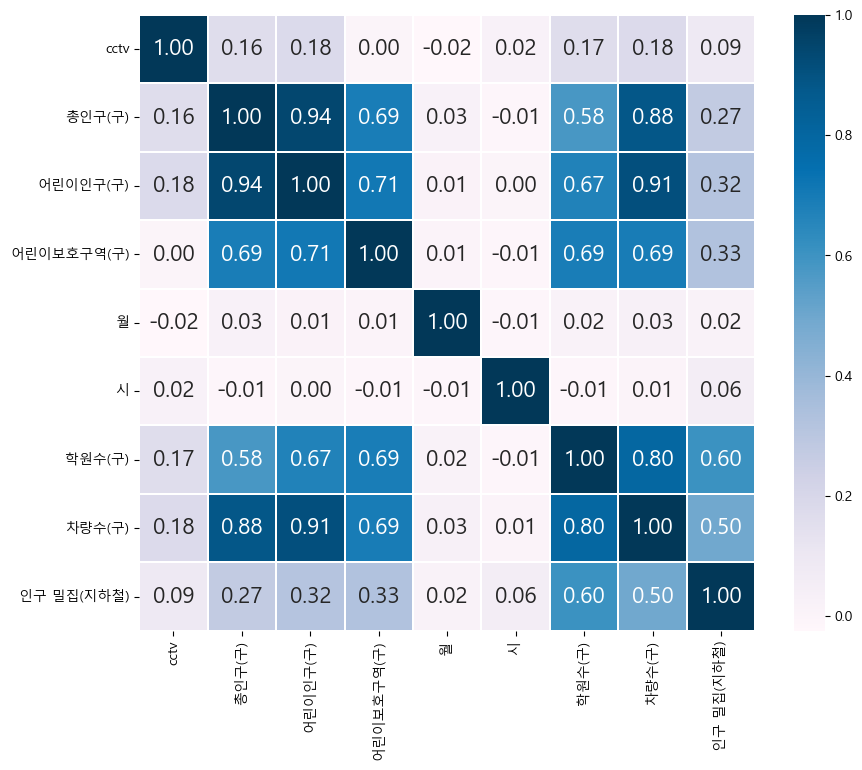

In [ ]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,fmt = '.2f',
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [ ]:
filtered_childAc_all.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_165256\1794687159.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  filtered_childAc_all.corr()


,cctv,총인구(구),어린이인구(구),어린이보호구역(구),월,학원수(구),차량수(구),인구 밀집(지하철)
cctv,1.000000,0.164808,0.181129,0.001408,-0.024163,0.167529,0.176337,0.087899
총인구(구),0.164808,1.000000,0.942149,0.688617,0.026338,0.578203,0.880453,0.273784
어린이인구(구),0.181129,0.942149,1.000000,0.710459,0.013421,0.669232,0.911189,0.315691
어린이보호구역(구),0.001408,0.688617,0.710459,1.000000,0.006063,0.688336,0.693274,0.327795
월,-0.024163,0.026338,0.013421,0.006063,1.000000,0.017147,0.031599,0.019602
학원수(구),0.167529,0.578203,0.669232,0.688336,0.017147,1.000000,0.799829,0.604503
차량수(구),0.176337,0.880453,0.911189,0.693274,0.031599,0.799829,1.000000,0.495855
인구 밀집(지하철),0.087899,0.273784,0.315691,0.327795,0.019602,0.604503,0.495855,1.000000


In [ ]:
from scipy.stats import chi2_contingency

data = filtered_childAc_all

dependent_variable = data['사고유형']

independent_variables = data[["도로형태명","노면상태","요일","cctv", "총인구(구)", "어린이인구(구)", "어린이보호구역(구)","월","시", "학원수(구)","차량수(구)","인구 밀집(지하철)"]]

for independent_var in independent_variables.columns:
    cross_tab = pd.crosstab(dependent_variable, independent_variables[independent_var])

    chi2 = chi2_contingency(cross_tab)[0]
    n = cross_tab.sum().sum()
    phi2 = chi2 / n
    cramers_value = np.sqrt(phi2 / min(cross_tab.shape[0] - 1, cross_tab.shape[1] - 1))

    print(f"Cramers V value for {independent_var}:", cramers_value)

Cramers V value for 도로형태명: 0.14992247612759485
Cramers V value for 노면상태: 0.06304567215214463
Cramers V value for 요일: 0.07962060392772317
Cramers V value for cctv: 0.24976963401075405
Cramers V value for 총인구(구): 0.2600328675287052
Cramers V value for 어린이인구(구): 0.2592658976691
Cramers V value for 어린이보호구역(구): 0.17462302901975055
Cramers V value for 월: 0.07177228280923967
Cramers V value for 시: 0.08063780960622903
Cramers V value for 학원수(구): 0.2556164373644473
Cramers V value for 차량수(구): 0.2600328675287052
Cramers V value for 인구 밀집(지하철): 0.37244907714113246


두 개의 독립변수 조합 중에 데이터가 없거나 유효한 항목이 없는 경우 빈칸이 생기며, 또한 데이터 세트 내에서 특정한 카테고리의 조합이 나타나지 않는 경우에 발생할 수 있음(범주형 데이터의 경우 발생함)

# 3. 데이터 분할

In [ ]:
from imblearn.under_sampling import OneSidedSelection
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.DataFrame(data=filtered_childAc_all)

In [ ]:
df['사고유형'] = df['사고유형'].astype(dtype='str')

In [ ]:
target = df['사고유형']

df = df.drop(columns = '사고유형')
df = pd.get_dummies(df)

df['사고유형'] = target
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2443 entries, 2985 to 8897
Data columns (total 80 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   cctv                  2443 non-null   int64 
 1   총인구(구)                2443 non-null   int64 
 2   어린이인구(구)              2443 non-null   int64 
 3   어린이보호구역(구)            2443 non-null   int64 
 4   월                     2443 non-null   int64 
 5   학원수(구)                2443 non-null   int64 
 6   차량수(구)                2443 non-null   int64 
 7   인구 밀집(지하철)            2443 non-null   int64 
 8   요일_금요일                2443 non-null   uint8 
 9   요일_목요일                2443 non-null   uint8 
 10  요일_수요일                2443 non-null   uint8 
 11  요일_월요일                2443 non-null   uint8 
 12  요일_일요일                2443 non-null   uint8 
 13  요일_토요일                2443 non-null   uint8 
 14  요일_화요일                2443 non-null   uint8 
 15  시군구_강남구               2443 non-null

,cctv,총인구(구),어린이인구(구),어린이보호구역(구),월,학원수(구),차량수(구),인구 밀집(지하철),요일_금요일,요일_목요일,...,시_21,도로형태명_고가도로위,도로형태명_교량,도로형태명_교차로부근,도로형태명_교차로안,도로형태명_교차로횡단보도내,도로형태명_기타,도로형태명_주차장,도로형태명_지하차도(도로)내,사고유형
2985,216,537978,58183,96,1,747,153620,4279928,0,0,...,0,0,0,0,0,1,0,0,0,차대차 - 측면충돌
2987,803,360227,35434,66,1,467,143940,6172896,0,1,...,0,0,0,0,0,1,0,0,0,차대사람 - 횡단중
2988,830,458745,54273,85,1,1062,150521,1895868,0,1,...,0,0,0,0,0,1,0,0,0,차대사람 - 횡단중
2990,259,589934,64367,73,1,707,204466,4348446,1,0,...,0,0,0,0,0,0,1,0,0,차대사람 - 보도통행중
2999,300,390502,38633,51,1,458,105476,11031551,0,0,...,0,0,0,0,0,0,1,0,0,차대사람 - 기타
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8872,555,566040,50443,89,12,708,207536,5395677,1,0,...,0,0,0,0,0,1,0,0,0,차대사람 - 횡단중
8886,243,393213,35704,59,12,397,148659,6549935,0,0,...,0,0,0,0,0,1,0,0,0,차대사람 - 횡단중
8889,294,383029,29781,41,12,271,116094,1904810,0,0,...,0,0,0,0,0,0,1,0,0,차대사람 - 길가장자리구역통행중
8890,164,483261,27449,70,12,415,118615,7989219,0,0,...,0,0,0,0,0,1,0,0,0,차대사람 - 횡단중


In [ ]:
X = df.drop(columns = '사고유형')
y = df['사고유형']

In [ ]:
smote = SMOTE(random_state=0, k_neighbors=3)
X, y = smote.fit_resample(X, y)

In [ ]:
enn = EditedNearestNeighbours(n_neighbors=5)
X, y= enn.fit_resample(X, y)

In [ ]:
y.count()

2279

In [ ]:
y.value_counts()

차대사람 - 기타            841
차대차 - 후진중충돌          456
차대차 - 정면충돌           250
차대차 - 추돌             242
차대사람 - 길가장자리구역통행중    118
차대사람 - 차도통행중         108
차대차 - 기타              90
차대차 - 측면충돌            90
차대사람 - 보도통행중          68
차대사람 - 횡단중            16
Name: 사고유형, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. 모델 학습

### Random Forest

In [ ]:
df['사고유형'] = df['사고유형'].astype(dtype='str')

In [ ]:
target = df['사고유형']

df = df.drop(columns = '사고유형')
df = pd.get_dummies(df)

df['사고유형'] = target
df.info()
df

In [ ]:
df_train, df_test = train_test_split(df,
                                     test_size = 0.3,
                                     stratify = df['사고유형'],
                                     random_state = 156)

In [ ]:
df_train.shape

In [ ]:
df_test.shape

In [ ]:
df_train['사고유형'].value_counts(normalize = True)

In [ ]:
df_test['사고유형'].value_counts(normalize = True)

In [ ]:
train_x = df_train.drop(columns = '사고유형')
train_y = df_train['사고유형']

In [ ]:
clf = tree.DecisionTreeClassifier(random_state = 156,  # 난수 고정
                                  max_depth = 3)

In [ ]:
model = clf.fit(X = train_x, y = train_y)

In [ ]:
plt.rcParams.update({'figure.dpi'     : '60',
                     'figure.figsize' : [18,8]})
tree.plot_tree(model);

In [ ]:
tree.plot_tree(model,
               feature_names = train_x.columns,
               class_names = ['차대사람 - 횡단중', '차대사람 - 기타', '차대차 - 기타', '차대차 - 측면충돌','차대사람 - 차도통행중','차대사람 - 보도통행중','차대사람 - 길가장자리구역통행중','차대차 - 추돌','차대차 - 정면충돌'],
               proportion = True,
               filled = True,
               rounded = True,
               impurity = False,
               label = 'root',
               fontsize = 10);

In [ ]:
test_x = df_test.drop(columns = '사고유형')
test_y = df_test['사고유형']

In [ ]:
df_test['pred'] = model.predict(test_x)
df_test

In [ ]:
unique_values = df_test['사고유형'].value_counts()

print(unique_values)

In [ ]:
conf_mat = confusion_matrix(y_true = df_test['사고유형'],  # 실제값
                            y_pred = df_test['pred'],    # 예측값
                            labels = ['차대사람 - 횡단중', '차대사람 - 기타', '차대차 - 기타', '차대차 - 측면충돌','차대사람 - 차도통행중','차대사람 - 보도통행중','차대사람 - 길가장자리구역통행중','차대차 - 추돌','차대차 - 정면충돌'])    # 클래스 배치 순서
conf_mat

In [ ]:
p = ConfusionMatrixDisplay(confusion_matrix = conf_mat,
                           display_labels = ('차대사람 - 횡단중', '차대사람 - 기타', '차대차 - 기타', '차대차 - 측면충돌','차대사람 - 차도통행중','차대사람 - 보도통행중','차대사람 - 길가장자리구역통행중','차대차 - 추돌','차대차 - 정면충돌'))
p.plot(cmap = 'Blues')

In [ ]:
metrics.accuracy_score(y_true = df_test['사고유형'], y_pred = df_test['pred'])

------------------------------------------------------

### RandomForest + Gradient Boosting

In [ ]:
rf_clf = RandomForestClassifier(random_state=156)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9547


In [ ]:
params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}

rf_clf = RandomForestClassifier(random_state=156, n_jobs=1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.6702


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=156)
rf_clf1.fit(X_train , y_train)

train_pred = rf_clf1.predict(X_train)
train_accuracy = accuracy_score(y_train , train_pred)

test_pred = rf_clf1.predict(X_test)
test_accuracy = accuracy_score(y_test , test_pred)

print('Training Accuracy: {0:.4f}'.format(train_accuracy))
print('Test Accuracy: {0:.4f}'.format(test_accuracy))

if train_accuracy - test_accuracy > 0.05:
    print("The model may be overfitting.")
else:
    print("The model appears to be performing well.")

Training Accuracy: 0.7812
Test Accuracy: 0.7573
The model appears to be performing well.


In [ ]:
cv_scores = cross_val_score(rf_clf1, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.74294671 0.72413793 0.71473354 0.71473354 0.74294671]


In [ ]:
y_train.value_counts()

차대사람 - 기타            576
차대차 - 후진중충돌          313
차대차 - 정면충돌           179
차대차 - 추돌             162
차대사람 - 길가장자리구역통행중     92
차대사람 - 차도통행중          76
차대차 - 측면충돌            68
차대차 - 기타              65
차대사람 - 보도통행중          51
차대사람 - 횡단중            13
Name: 사고유형, dtype: int64

--------------------------------------------------------------------

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=156)
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=156)

# Create a Voting Classifier (Ensemble)
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('gradient_boosting', gb_classifier)
], voting='soft')  # 'soft' for soft voting, you can also use 'hard' for hard voting

# Fit the ensemble model on the training data
voting_classifier.fit(X_train, y_train)

# Make predictions on the test data using the ensemble model
ensemble_predictions = voting_classifier.predict(X_test)

# Calculate the accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

# Print the accuracy of the ensemble model
print("Ensemble Model Accuracy:", ensemble_accuracy)

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

voting_classifier.fit(X_train, y_train)

# Make predictions on the training data
train_predictions = voting_classifier.predict(X_train)

# Make predictions on the validation data
validation_predictions = voting_classifier.predict(X_validation)  # Use your validation set here

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, train_predictions)

# Calculate the validation accuracy
validation_accuracy = accuracy_score(y_validation, validation_predictions)

# Print the training and validation accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", validation_accuracy)

# Check for overfitting
if train_accuracy - validation_accuracy > 0.05:  # You can adjust the threshold as needed
    print("The ensemble model may be overfitting.")
else:
    print("The ensemble model appears to be performing well.")

-----------------------------------------------------------

In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_leaf=8, min_samples_split=8, random_state=156)

In [ ]:
cv_scores = cross_val_score(rf_clf1, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize the model with early stopping
gb_clf = GradientBoostingClassifier(n_estimators=1000, validation_fraction=0.1, n_iter_no_change=5, random_state=42)

# Fit the model
gb_clf.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions = gb_clf.predict(X_val)

# Evaluate the model
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", val_accuracy)

In [ ]:
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

### Voting Classifier

In [ ]:
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=10)

vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft')

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3 , random_state= 156)

vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))


classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

--------------------------------------------------------------

In [ ]:
def print_metrics(y, pred, title=None):
    acc = accuracy_score(y, pred)
    if title:
        print(title)
    print("정확도: ", acc)

In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=1000, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)

In [ ]:
estimator = [('LR',lr_clf),('rf',rf_clf1)]
voting = VotingClassifier(estimator, voting='soft')
voting.fit(X_train, y_train)

In [ ]:
pred_train = voting.predict(X_train)
pred_test = voting.predict(X_test)

print_metrics(y_train, pred_train)
print_metrics(y_test, pred_test)

----------------------------------------------------------------------------

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X, y)
knn.score(X, y)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X, y)

for n in range(5, 100):
    knn.n_neighbors = n
    score = knn.score(X, y)
    # 100% 정확도에 미치지 못하는 이웃 개수 출력
    if score < 1:
        print(n, score)
        break

In [ ]:
kn100 = KNeighborsClassifier(n_neighbors=10)
kn100.fit(X, y)
kn100.score(X, y)

### Voting

In [ ]:
classifier1 = RandomForestClassifier(n_estimators=100,random_state=42)
classifier2 = GradientBoostingClassifier(random_state=42)

voting_classifier = VotingClassifier(estimators=[
    ('rf', classifier1),
    ('gb', classifier2)
], voting='soft')
voting_classifier.fit(X_train, y_train)
y_pred = voting_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"보팅 정확도: {accuracy}")

In [ ]:
voting_classifier.fit(X_train, y_train)

# Predict on the training data
y_train_pred = voting_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = voting_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

### Extremely Randomized Trees

In [ ]:
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees_classifier.fit(X_train, y_train)
y_pred = extra_trees_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Extremely 정확도: {accuracy}")

### Ada + RandomForest Voting

In [ ]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
ada_boost_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
ensemble_classifier = VotingClassifier(estimators=[
    ('rf', random_forest_classifier),
    ('ada', ada_boost_classifier)
], voting='soft')

ensemble_classifier.fit(X_train, y_train)
y_pred = ensemble_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"정확도: {accuracy}")

### Ada + RandomForest Bagging

In [ ]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
ada_boost_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
bagging_classifier = BaggingClassifier(base_estimator=ensemble_classifier, n_estimators=10, random_state=42)

bagging_classifier.fit(X_train, y_train)
y_pred = bagging_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

### RandomForest + Logics Voting

In [ ]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
logistic_regression = LogisticRegression(random_state=42)

voting_classifier = VotingClassifier(estimators=[
    ('rf', random_forest_classifier),
    ('lr', logistic_regression)
], voting='soft')


voting_classifier.fit(X_train, y_train)
y_pred = voting_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

### RandomForest + Logics Bagging

In [ ]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
logistic_regression = LogisticRegression(random_state=42)

bagging_classifier_rf = BaggingClassifier(base_estimator=random_forest_classifier, n_estimators=10, random_state=42)
bagging_classifier_lr = BaggingClassifier(base_estimator=logistic_regression, n_estimators=10, random_state=42)

bagging_classifier_rf.fit(X_train, y_train)
bagging_classifier_lr.fit(X_train, y_train)

y_pred_rf = bagging_classifier_rf.predict(X_test)
y_pred_lr = bagging_classifier_lr.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("Random Forest Bagging Accuracy:", accuracy_rf)
print("Logistic Regression Bagging Accuracy:", accuracy_lr)

### RandomForest + Ada + Logics

In [ ]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
ada_boost_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
logistic_regression = LogisticRegression(random_state=42)
ensemble_classifier = VotingClassifier(estimators=[
    ('rf', random_forest_classifier),
    ('ada', ada_boost_classifier),
    ('lr', logistic_regression)  # 새로운 모델 추가
], voting='soft')


ensemble_classifier.fit(X_train, y_train)
y_pred = ensemble_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"정확도: {accuracy}")

### 스태킹 앙상블

In [ ]:
# 개별 ML 모델을 위한 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=10)
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=10)

# 최종 Stacking 모델을 위한 Classifier생성.
lr_final = LogisticRegression(C=10)


In [ ]:
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train , y_train)
dt_clf.fit(X_train , y_train)
ada_clf.fit(X_train, y_train)

In [ ]:
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f} :'.format(accuracy_score(y_test, ada_pred)))

In [ ]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

In [ ]:
pred = np.transpose(pred)
print(pred.shape)

### SVM

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear', C=0.01)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7660818713450293
Classification Report:
                    precision    recall  f1-score   support

        차대사람 - 기타       0.90      0.96      0.93       265
차대사람 - 길가장자리구역통행중       0.50      0.46      0.48        26
     차대사람 - 보도통행중       0.75      0.35      0.48        17
     차대사람 - 차도통행중       0.71      0.31      0.43        32
       차대사람 - 횡단중       1.00      0.33      0.50         3
         차대차 - 기타       1.00      0.04      0.08        25
       차대차 - 정면충돌       0.58      0.87      0.70        71
         차대차 - 추돌       0.56      0.56      0.56        80
       차대차 - 측면충돌       0.88      0.64      0.74        22
      차대차 - 후진중충돌       0.79      0.83      0.81       143

         accuracy                           0.77       684
        macro avg       0.77      0.54      0.57       684
     weighted avg       0.78      0.77      0.75       684



In [ ]:
y_train.value_counts()

차대사람 - 기타            576
차대차 - 후진중충돌          313
차대차 - 정면충돌           179
차대차 - 추돌             162
차대사람 - 길가장자리구역통행중     92
차대사람 - 차도통행중          76
차대차 - 측면충돌            68
차대차 - 기타              65
차대사람 - 보도통행중          51
차대사람 - 횡단중            13
Name: 사고유형, dtype: int64

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear', C=0.01)
svm_model.fit(X_train_scaled, y_train)

y_train_pred = svm_model.predict(X_train_scaled)
training_accuracy = accuracy_score(y_train, y_train_pred)

y_pred = svm_model.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Training Accuracy:", training_accuracy)
print("Test Accuracy:", test_accuracy)

print("Classification Report:\n", classification_rep)

Training Accuracy: 0.7724137931034483
Test Accuracy: 0.7660818713450293
Classification Report:
                    precision    recall  f1-score   support

        차대사람 - 기타       0.90      0.96      0.93       265
차대사람 - 길가장자리구역통행중       0.50      0.46      0.48        26
     차대사람 - 보도통행중       0.75      0.35      0.48        17
     차대사람 - 차도통행중       0.71      0.31      0.43        32
       차대사람 - 횡단중       1.00      0.33      0.50         3
         차대차 - 기타       1.00      0.04      0.08        25
       차대차 - 정면충돌       0.58      0.87      0.70        71
         차대차 - 추돌       0.56      0.56      0.56        80
       차대차 - 측면충돌       0.88      0.64      0.74        22
      차대차 - 후진중충돌       0.79      0.83      0.81       143

         accuracy                           0.77       684
        macro avg       0.77      0.54      0.57       684
     weighted avg       0.78      0.77      0.75       684



In [ ]:
svm_model = SVC(kernel='linear', C=0.01)

cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [0.78056426 0.72727273 0.70219436 0.72100313 0.7460815 ]
Mean CV Accuracy: 0.735423197492163
